In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score, precision_score,  f1_score, recall_score

In [ ]:
file_path = '/content/Advertising-efficiency.xlsx'

# Loading And Reading Dataset
data = pd.read_excel(file_path)
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Unknown,Sex,Country,Missing_Col,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Sfax,Unknown,0,Tunisia,NaN,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,Unknown,1,Nauru,NaN,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,Unknown,0,San Marino,NaN,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Unknown,1,Italy,NaN,2016-01-10 02:31:19,0
4,68.37,35,NaN,225.58,Robust logistical utilization,South Manuel,Unknown,0,Iceland,NaN,2016-06-03 03:36:18,0


In [ ]:
data.tail()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Unknown,Sex,Country,Missing_Col,Timestamp,Clicked on Ad
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,Unknown,1,Lebanon,NaN,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,Unknown,1,Bosnia and Herzegovina,NaN,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,Unknown,1,Mongolia,NaN,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,Unknown,0,Guatemala,NaN,2016-03-24 02:35:54,0
999,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,Unknown,0,Brazil,NaN,2016-06-03 21:43:21,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               995 non-null    float64
 3   Daily Internet Usage      997 non-null    float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Unknown                   1000 non-null   object 
 7   Sex                       1000 non-null   int64  
 8   Country                   1000 non-null   object 
 9   Missing_Col               0 non-null      float64
 10  Timestamp                 1000 non-null   object 
 11  Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 93.9+ KB


# Feature Information :
***Daily Time Spent on Site***: Count of minutes spent scrolling the site

***Age***: average age of Website_visitor (Year)(int)

***Area income***: average income for the Website_visitor(Money)(float)

***Daily internet Usage***: Count of minutes spent scrolling the internet (minutes)(int)

***Ad Topic Line***: the topic of the AD(Description)(string)

***City***:City of living(Place)(string)

***Sex***: 1 if male 0 if not(Sex)(Boolean)

***Country***: Country of living(Place)(string)

***Timestamp***: time when the Website_visitor finished with the ADD(Time)

***Clicked on Ad***: if the user has clicked on the AD or Not(Binary)(Boolean)


In [ ]:
data.shape

(1000, 12)

In [ ]:
data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Unknown', 'Sex',
       'Country', 'Missing_Col', 'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [ ]:
# Checking the Number of zero value
missing_values = data.isnull()
missing_counts = missing_values.sum()
# Print the columns with missing values and their respective counts
print("Columns with missing values:")
print(missing_counts[missing_counts > 0])

Columns with missing values:
Area Income                5
Daily Internet Usage       3
Missing_Col             1000
dtype: int64


In [ ]:
# Checking the duplicate Records
data.duplicated().sum()

0

In [ ]:
numerical_columns = data.select_dtypes(include=[float, int])  # Select numerical columns
numerical_columns.describe().T  # Get the summary statistics for numerical columns


,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,1000.0,65.000200,15.853615,32.60,51.360,68.215,78.5475,91.43
Age,1000.0,36.009000,8.785562,19.00,29.000,35.000,42.0000,61.00
Area Income,995.0,55032.802643,13381.164289,13996.50,47095.115,57014.840,65479.3500,79484.80
Daily Internet Usage,997.0,180.179498,43.845211,104.78,139.020,183.430,218.8000,269.96
Sex,1000.0,0.481000,0.499889,0.00,0.000,0.000,1.0000,1.00
Missing_Col,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Clicked on Ad,1000.0,0.500000,0.500250,0.00,0.000,0.500,1.0000,1.00


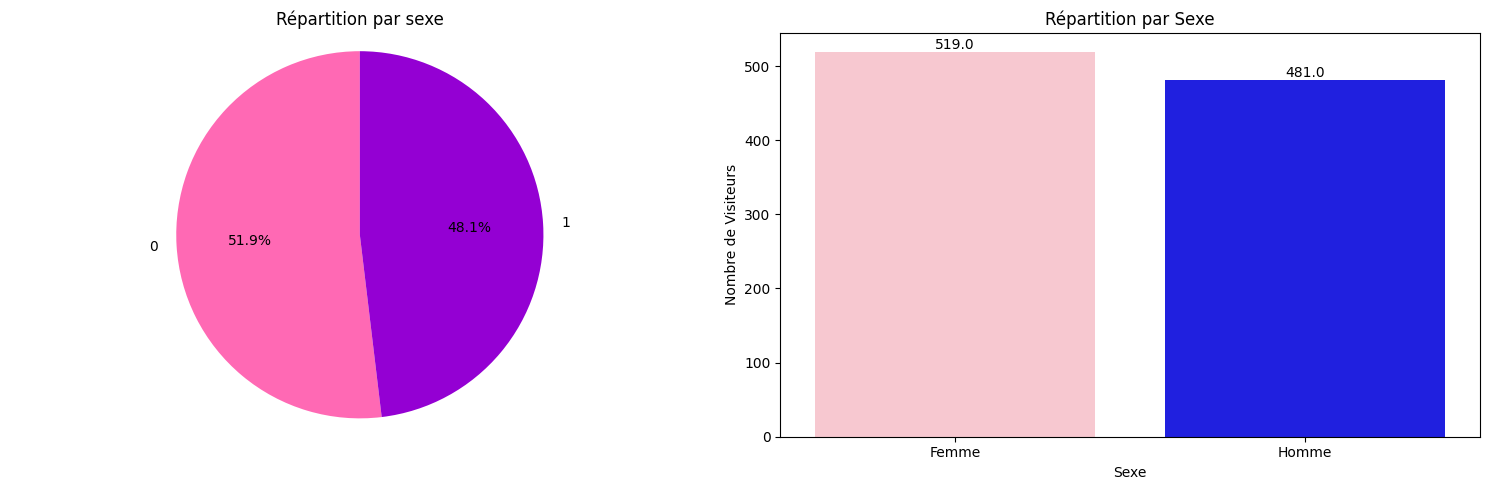

In [ ]:
# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
colors = ['#FF69B4', '#9400D3']
# First Subplot - Pie Chart
gender_counts = data['Sex'].value_counts()
axs[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90 , colors=colors)
axs[0].axis('equal')
axs[0].set_title('Répartition par sexe')

# Second Subplot - Bar Chart
sns.countplot(data=data, x='Sex', ax=axs[1], palette=['pink', 'blue'])
axs[1].set_title("Répartition par Sexe")
axs[1].set_xlabel("Sexe")
axs[1].set_ylabel("Nombre de Visiteurs")
axs[1].set_xticklabels(['Femme', 'Homme'])
# Add values on top of the bars in the bar chart
for p in axs[1].patches:
    axs[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


###  Interpretation
The distribution of visitors to your site reveals that women make up 51.9% of the audience, while men comprise 48.1%. This suggests a relatively close gender balance among site visitors, with a slight female predominance. This information can be valuable for tailoring marketing strategies, analyzing visitor behavior by gender, making strategic decisions, and promoting inclusivity within your audience. It's essential to consider this distribution in the context of your overall data to gain a comprehensive understanding of your audience.



In [ ]:
#compter le nombre de clics sur l'annonce (clicked on ad) en fonction du sexe(sex)
clicks_by_gender = data.groupby('Sex')['Clicked on Ad'].value_counts().unstack()
clicks_by_gender

Clicked on Ad,0,1
Sex,,
0,250,269
1,250,231


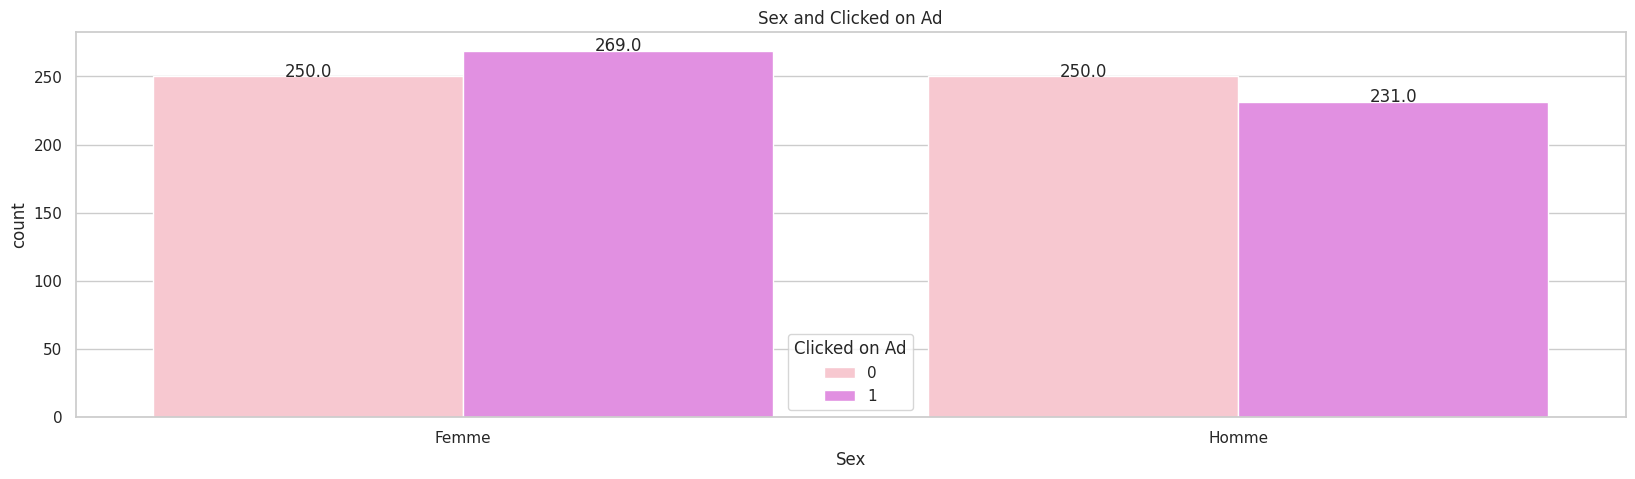

In [ ]:
# Analysis: sex and Clicked on Ad
plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")
ax = sns.countplot(data=data, x='Sex', hue='Clicked on Ad', palette=['pink', 'violet'])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.title("Sex and Clicked on Ad")

ax.set_xticklabels(['Femme', 'Homme'])
plt.show()


### Interpretation :
These results depict the distribution of ad clicks based on gender. For instance, there are more women (269) who clicked on the ad compared to men (231). This information can be valuable for assessing ad performance based on the gender of the target audience.


In [ ]:
#compter le nombre de clics sur l'annonce (clicked on ad) en fonction du Age
clicks_by_gender = data.groupby('Age')['Clicked on Ad'].value_counts().unstack()
clicks_by_gender.head()

Clicked on Ad,0,1
Age,,
19,5.0,1.0
20,5.0,1.0
21,6.0,NaN
22,12.0,1.0
23,11.0,8.0


### Interpretation
For individuals aged 19, there were 5 instances of not clicking on the ad and 1 instance of clicking on the ad.
Similarly, for those aged 20, there were 5 instances of not clicking and 1 instance of clicking.
At the age of 21, there were 6 instances of not clicking, but the number of clicks is missing (NaN), indicating a potential data gap.
Individuals aged 22 recorded 12 instances of not clicking and 1 instance of clicking.
Finally, for those aged 23, there were 11 instances of not clicking and 8 instances of clicking on the ad.

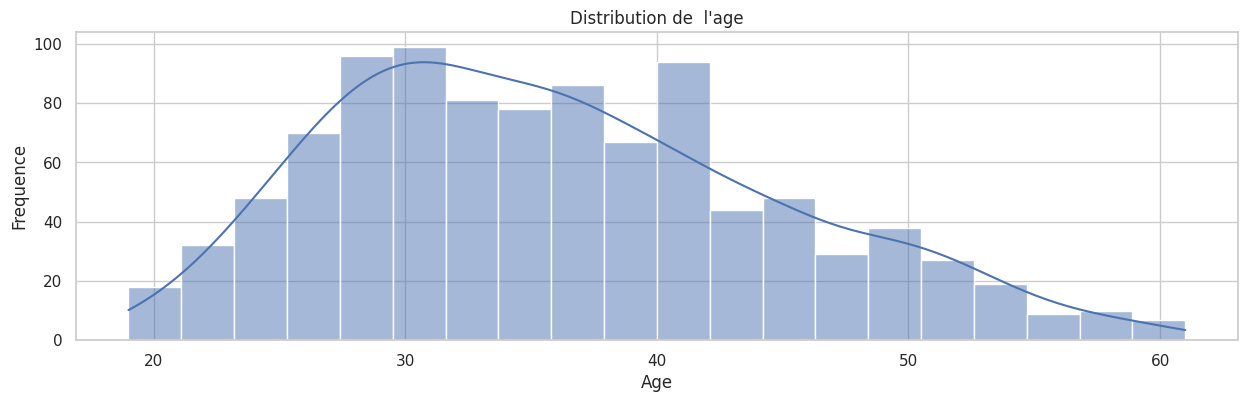

In [ ]:
#visualisation : Creer un histogramme de l'age (Age)
plt.figure(figsize=(15,4))
sns.histplot(data['Age'],bins=20 , kde=True )
plt.title('Distribution de  l\'age')
plt.xlabel('Age')
plt.ylabel('Frequence')
plt.show()

###Interpretation
The age distribution is not symmetrical. It exhibits a slight leftward skew, indicating a predominance of young adults among the individuals.

The most frequent age falls within the range of 26 to 30 years, with a frequency of approximately 100 individuals. This suggests that the majority of visitors are between 26 and 30 years old.

Following this first range, the frequency gradually decreases as age increases. However, there is another peak in the age range of 40 to 42 years, with a frequency of approximately 90 individuals. This indicates a significant proportion of visitors in that age bracket as well.

Beyond the age of 42, the frequency continues to decline, indicating that older individuals are less represented among the visitors.

Text(0.5, 1.0, 'Age and Clicked on Ad')

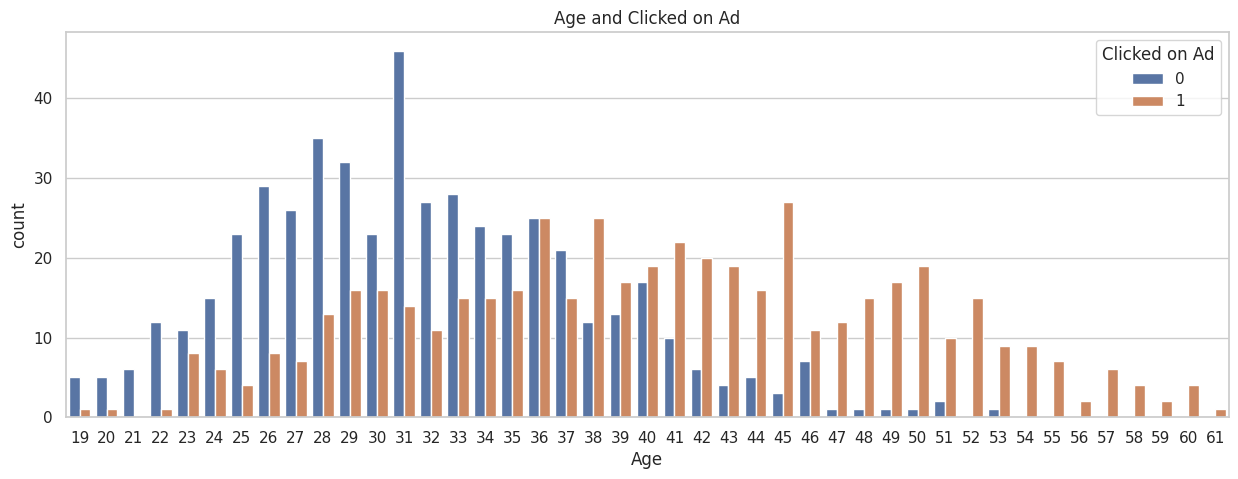

In [ ]:
# Analysis:  Age and Clicked on Ad
plt.figure(figsize=(15,5))
sns.countplot(data= data, x='Age', hue='Clicked on Ad')
plt.title("Age and Clicked on Ad")


###  Interpretation:
Individuals aged 19 years showed 5 cases of non-clicks on the ad (0) and 1 case of ad clicks (1).
Similarly, individuals aged 20 years recorded 5 cases of non-clicks (0) and 1 case of clicks (1).
For the age of 21 years, 6 cases of non-clicks (0) were observed, but no clicks (0) were recorded.
At the age of 22 years, 12 cases of non-clicks (0) were noted, while there was 1 case of a click (1).
For the age of 23 years, 11 cases of non-clicks (0) and 8 cases of clicks (1) were observed.
These observations continue for each age group, providing an overview of the distribution of clicks and non-clicks based on age.
These data allow for an analysis of how ad-click behavior varies by age, which can be useful for assessing the impact of age on interactions with ad content.


In [ ]:
#City with highest click counts (the total number of times an ad was clicked (value = 1))
topcity_clickedadd = data[data["Clicked on Ad"] == 1].groupby("City")["Clicked on Ad"].sum()
topcity_clickedadd.sort_values(ascending=False)

City
Lisamouth       2
Lake David      2
South Lisa      2
West Shannon    2
Lake James      2
               ..
Johnsontown     1
Joechester      1
Jessicastad     1
Jessicashire    1
Zacharyton      1
Name: Clicked on Ad, Length: 490, dtype: int64

### Interpretation:
The results show the cities (City) where the number of ad clicks is the highest, with each city having recorded a total of 1 click on at least one ad. This means that in each of these cities, at least one person has interacted by clicking on an ad. The 490 listed cities have each contributed to the generation of ad clicks, indicating that the reach of the ads covers a wide range of geographical areas.

In [ ]:
#Country with highest click counts (the total number of times an ad was clicked (value = 1))
topCounty_clickedadd = data[data["Clicked on Ad"] == 1].groupby("Country")["Clicked on Ad"].sum()
topCounty_clickedadd.sort_values(ascending=False)

Country
Australia          7
Turkey             7
Ethiopia           7
Liberia            6
South Africa       6
                  ..
Azerbaijan         1
Kyrgyz Republic    1
Kuwait             1
Kiribati           1
Macedonia          1
Name: Clicked on Ad, Length: 215, dtype: int64

<ipython-input-18-f3d8ab91c6d6>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


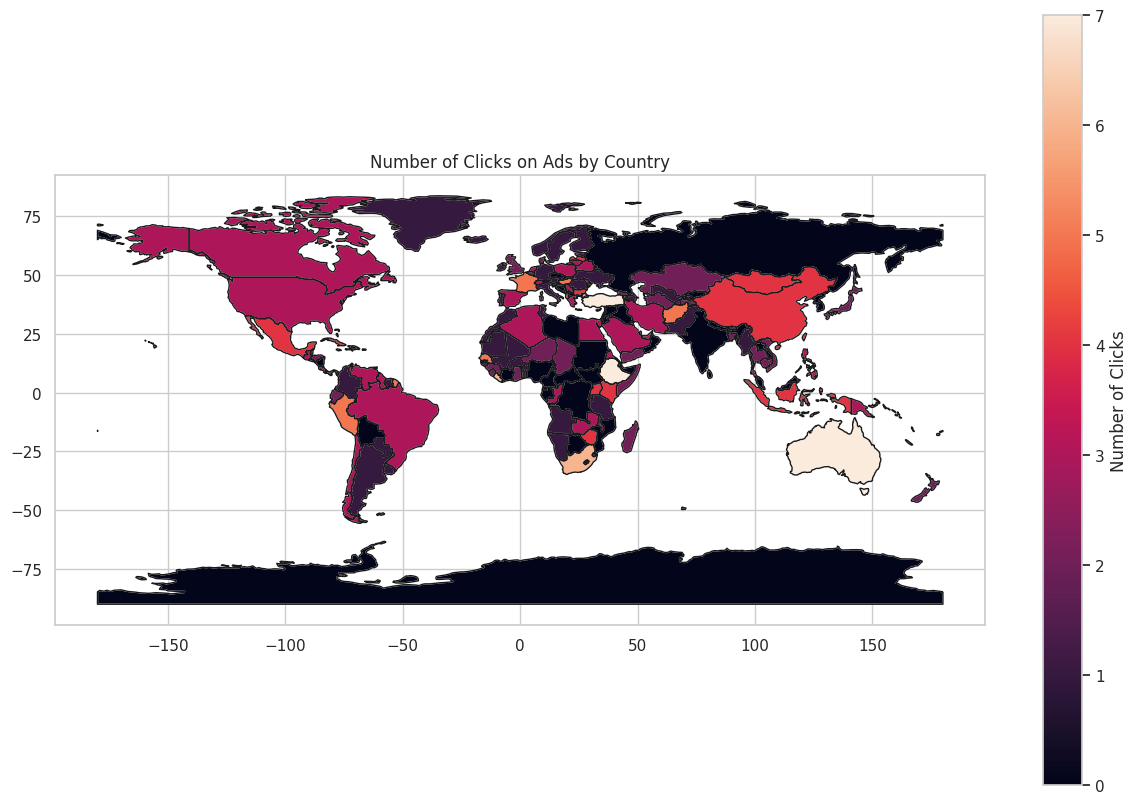

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read a world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the data to keep only the clicks (Clicked on Ad = 1)
clicked_ads = data[data["Clicked on Ad"] == 1]

# Group the data by country and count the number of clicks per country
country_click_counts = clicked_ads.groupby("Country")["Clicked on Ad"].sum()

# Merge the click data with world data using country names
world = world.merge(country_click_counts, left_on='name', right_on='Country', how='left')

# Replace NaN values with 0 (for countries without clicks)
world['Clicked on Ad'] = world['Clicked on Ad'].fillna(0)

# Create a world map with the number of clicks
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1, color='k')
world.plot(column='Clicked on Ad', ax=ax, legend=True, legend_kwds={'label': "Number of Clicks"})
ax.set_title("Number of Clicks on Ads by Country")
plt.show()


### Interpretation
Afghanistan leads as the country with the highest number of ad clicks, totaling 5 clicks.
Albania closely follows with 4 ad clicks.
Algeria is also ranked well with 3 ad clicks.
Many other countries have generated ad clicks, ranging from 2 to 1 click.

In [ ]:
#City with highest Area Income
city_income= data.groupby("Country")["Area Income"].mean()
city_income.sort_values(ascending=False)

Country
Jordan                                                 74780.740000
Seychelles                                             71069.883333
Finland                                                70201.888000
New Caledonia                                          69850.920000
Suriname                                               69525.250000
                                                           ...     
Uzbekistan                                             38675.720000
British Indian Ocean Territory (Chagos Archipelago)    31087.540000
Tajikistan                                             30943.926667
Germany                                                28679.930000
Marshall Islands                                       25371.520000
Name: Area Income, Length: 237, dtype: float64

###  Interpretation:
The top five cities, such as "Port Erinberg," "Phelpschester," "Sabrinaview," "Stephenborough," and "Christopherchester," have the highest levels of Internet usage, far exceeding 250 minutes per day. In contrast, the three last cities, "Port Paultown," "Samanthaland," "New Debbiestad," "New Rachel," and "West Katiefurt," display lower values, suggesting lower levels of Internet usage. This variation in Internet consumption may reflect differences in infrastructure, Internet access, or user behavior in these different cities.

In [ ]:
#Country with highest Area Income
country_income= data.groupby("Country")["Area Income"].mean()
country_income.sort_values(ascending=False)

Country
Jordan                                                 74780.740000
Seychelles                                             71069.883333
Finland                                                70201.888000
New Caledonia                                          69850.920000
Suriname                                               69525.250000
                                                           ...     
Uzbekistan                                             38675.720000
British Indian Ocean Territory (Chagos Archipelago)    31087.540000
Tajikistan                                             30943.926667
Germany                                                28679.930000
Marshall Islands                                       25371.520000
Name: Area Income, Length: 237, dtype: float64

In [ ]:
#City with highest Daily Internet Usage
city_internetusage= data.groupby("City")["Daily Internet Usage"].mean()
city_internetusage.sort_values(ascending=False)

City
Port Erinberg         269.96
Phelpschester         267.01
Sabrinaview           261.52
Stephenborough        261.02
Christopherchester    259.76
                       ...  
Port Paultown         105.00
Samanthaland          104.78
New Debbiestad           NaN
New Rachel               NaN
West Katiefurt           NaN
Name: Daily Internet Usage, Length: 971, dtype: float64

###  Interpretation:
The top five cities, such as "Port Erinberg," "Phelpschester," "Sabrinaview," "Stephenborough," and "Christopherchester," have the highest levels of Internet usage, far exceeding 250 minutes per day. In contrast, the three last cities, "Port Paultown," "Samanthaland," "New Debbiestad," "New Rachel," and "West Katiefurt," display lower values, suggesting lower levels of Internet usage. This variation in Internet consumption may reflect differences in infrastructure, Internet access, or user behavior in these different cities.

In [ ]:
#City with highest Daily Time Spent on Site
city_timespent= data.groupby("City")["Daily Time Spent on Site"].mean()
city_timespent.sort_values(ascending=False)

City
West Carmenfurt    91.43
Lawsonshire        91.37
Joshuamouth        91.15
Michaelmouth       91.10
Kimberlytown       90.97
                   ...  
Masseyshire        32.99
Elizabethstad      32.91
New Keithburgh     32.84
Tylerport          32.60
New Henry          32.60
Name: Daily Time Spent on Site, Length: 971, dtype: float64

### Interpretation:
The top five cities, such as "West Carmenfurt," "Lawsonshire," "Joshuamouth," "Michaelmouth," and "Kimberlytown," have the highest levels of time spent on the website, exceeding 90 minutes per day. In contrast, the three last cities, "Masseyshire," "Elizabethstad," "New Keithburgh," "Tylerport," and "New Henry," display significantly lower values, around 32 minutes per day, suggesting lower levels of time spent on the website.

In [ ]:
#Country with highest Daily Internet Usage
country_internetusage= data.groupby("Country")["Daily Internet Usage"].mean()
country_internetusage.sort_values(ascending=False)

Country
Mozambique                                             248.230000
Malaysia                                               242.306667
Uzbekistan                                             241.750000
Bermuda                                                239.940000
India                                                  235.705000
                                                          ...    
Montenegro                                             124.535000
Saint Barthelemy                                       121.580000
Romania                                                121.070000
British Indian Ocean Territory (Chagos Archipelago)    118.390000
Montserrat                                             115.910000
Name: Daily Internet Usage, Length: 237, dtype: float64

###  Interpretation:
Mozambique has the highest average time spent on a website, with an average of 248.23 minutes per visit.

Malaysia takes the second position with an average of 242.31 minutes per visit.

Uzbekistan ranks third, with an average of 241.75 minutes per visit.

Bermuda secures the fourth place with an average of 239.94 minutes per visit.

India is fifth with an average of 235.71 minutes per visit.

On the other end of the spectrum, Montserrat has the lowest average time spent on a website, with an average of 115.91 minutes per visit.

Differences in the average time spent on a website can be influenced by various factors, including culture, internet access, user preferences, and the availability of online content.

In [ ]:
#Country with highest Daily Time Spent on Site
country_timespent= data.groupby("Country")["Daily Time Spent on Site"].mean()
country_timespent.sort_values(ascending=False)

Country
Lesotho                       89.800000
Reunion                       88.150000
Slovakia (Slovak Republic)    86.915000
Gibraltar                     86.443333
Aruba                         86.410000
                                ...    
Mayotte                       46.456667
Marshall Islands              43.160000
Sao Tome and Principe         42.320000
Lithuania                     42.073333
Kiribati                      36.370000
Name: Daily Time Spent on Site, Length: 237, dtype: float64

### Interpretation:
Lesotho stands out as the country where users spend the most time on websites each day, with an average of 89.8 minutes. This may reflect a strong interest in online browsing or frequent use of the Internet for various purposes.

Reunion takes the second position with an average of 88.15 minutes spent on websites each day. Users in this country also seem to invest a significant amount of time in their online experience.

The Slovak Republic (Slovakia) secures the third place with an average of 86.92 minutes per day, indicating a high level of engagement in online browsing within the Slovakian population.

Gibraltar ranks fourth, with an average of 86.44 minutes per day, suggesting a high level of online interaction.

Aruba completes the top five with an average of 86.41 minutes spent on websites each day. Users in Aruba also seem to enjoy extended online experiences.

These variations in time spent on websites can be influenced by cultural, socio-economic, and technological factors specific to each country. Companies and advertisers can utilize this data to gain a better understanding of online user behavior in different regions around the world.

## Preprocessing

In [ ]:
# Drop one or more columns
columns_to_drop = ['Unknown', 'Missing_Col']
data = data.drop(columns=columns_to_drop)

In [ ]:
# Define age categories
bins = [0, 15, 20, 30, 45, float('inf')]
labels = ['<15', '15-19', '20-29', '30-44', '>=45']

# Create a new column 'Age Category' based on age bins
age_categories = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

In [ ]:
#Handling "Area Income" missing values:
# Calculate mean 'Area Income' for each age category
age_category_means = data.groupby(age_categories)['Area Income'].transform('mean')

# Replace 'Area Income' values with the mean values of their respective age categories
data['Area Income'] = data['Area Income'].fillna(age_category_means)


In [ ]:
#Handling "Daily Internet Usage" missing values:
# Calculate mean 'Daily Internet Usage' for each age category
age_category_means_internet = data.groupby(age_categories)['Daily Internet Usage'].transform('mean')

# Replace 'Daily Internet Usage' values with the mean values of their respective age categories
data['Daily Internet Usage'] = data['Daily Internet Usage'].fillna(age_category_means_internet)

In [ ]:
# Converting 'Area Income' to float
data['Area Income'] = data['Area Income'].astype(float)

# Round 'Daily Internet Usage' to the nearest integer and convert it to integer
data['Daily Internet Usage'] = (data['Daily Internet Usage'] ).round().astype(int)

# Round 'Daily Time Spent on Site' to the nearest minute and convert it to integer
data['Daily Time Spent on Site'] = (data['Daily Time Spent on Site'] ).round().astype(int)

# Converting 'Timestamp' to datetime, extracting date
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Date'] = data['Timestamp'].dt.date
#data['Date'] = pd.to_datetime(data['Date'])
data = data.drop('Timestamp', axis=1)

In [ ]:
data.dtypes

Daily Time Spent on Site      int64
Age                           int64
Area Income                 float64
Daily Internet Usage          int64
Ad Topic Line                object
City                         object
Sex                           int64
Country                      object
Clicked on Ad                 int64
Date                         object
dtype: object

In [ ]:
# Save DataFrame to Excel file
#data.to_excel('Cleaned_Data.xlsx', index=False)

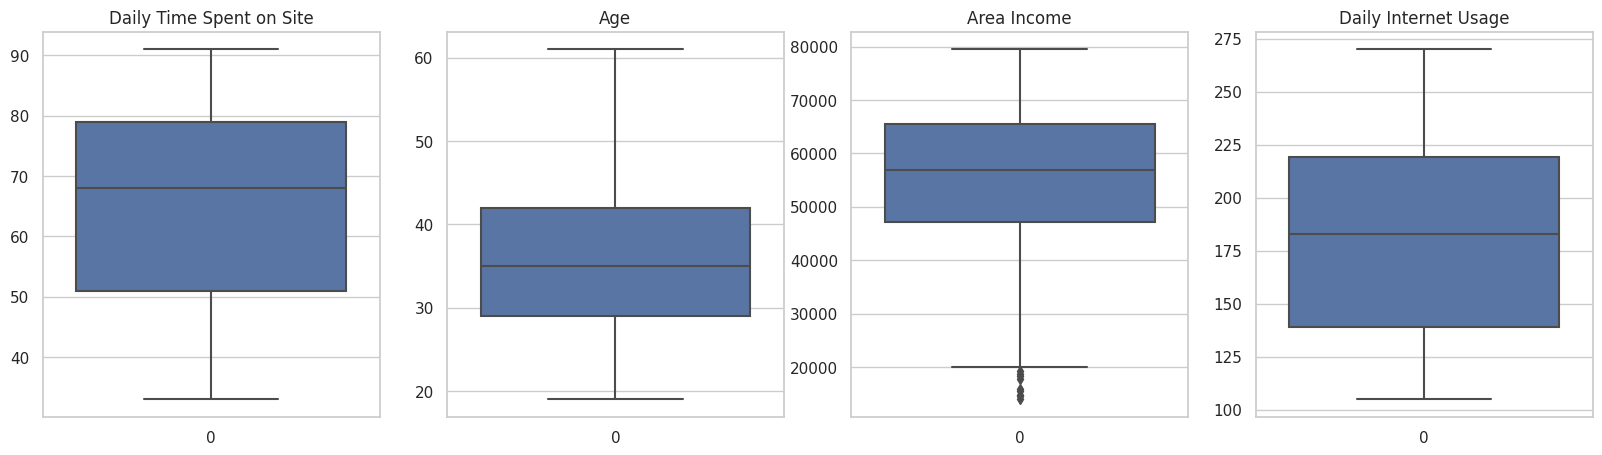

In [ ]:
# Checking outliers
vars = data.drop(["Ad Topic Line","City","Sex","Country","Clicked on Ad","Date"], axis = 1).columns

fig, axs = plt.subplots(1, len(vars), figsize=(20, 5))

for i, var in enumerate(vars):
    sns.boxplot(data=data[var], ax=axs[i])
    axs[i].set_title(var)


In [ ]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Sex,Country,Clicked on Ad,Date
0,69,35,61833.900000,256,Cloned 5thgeneration orchestration,Sfax,0,Tunisia,0,2016-03-27
1,80,31,68441.850000,194,Monitored national standardization,West Jodi,1,Nauru,0,2016-04-04
2,69,26,59785.940000,236,Organic bottom-line service-desk,Davidton,0,San Marino,0,2016-03-13
3,74,29,54806.180000,246,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,2016-01-10
4,68,35,56900.665531,226,Robust logistical utilization,South Manuel,0,Iceland,0,2016-06-03


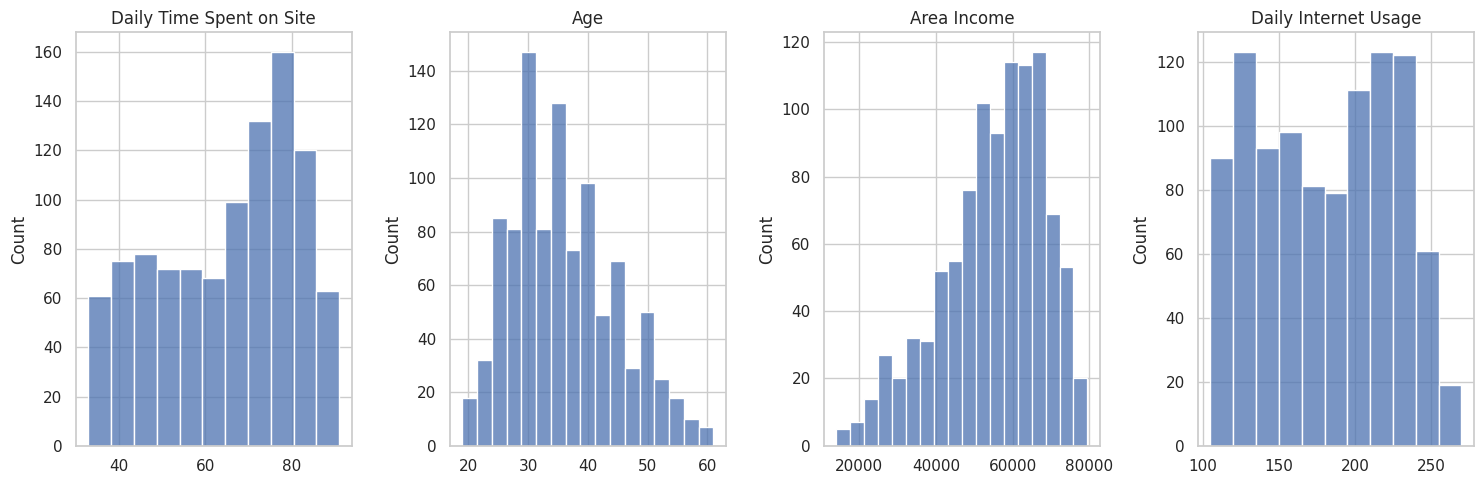

In [ ]:
# Set up the figure with multiple axes
fig, axs = plt.subplots(ncols=len(vars), figsize=(15,5))

# Plot the distribution of each variable on its own axis
for i, var in enumerate(vars):
    sns.histplot(data[var], ax=axs[i])
    axs[i].set_title(var)
    axs[i].set_xlabel('')

plt.tight_layout()
plt.show()

In [ ]:
# Encoding categorical columns using LabelEncoder
label_encoders = {}
for column in ['Ad Topic Line', 'City', 'Country']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [ ]:
# Checking the resulting DataFrame
data.head()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Sex,Country,Clicked on Ad,Date
0,69,35,61833.900000,256,91,764,0,215,0,2016-03-27
1,80,31,68441.850000,194,464,906,1,147,0,2016-04-04
2,69,26,59785.940000,236,566,112,0,184,0,2016-03-13
3,74,29,54806.180000,246,903,942,1,103,0,2016-01-10
4,68,35,56900.665531,226,766,808,0,96,0,2016-06-03


In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

columns_to_scale = ['Area Income', 'Daily Time Spent on Site', 'Daily Internet Usage', 'Age']
#lb9iya matest7a9eech t'scale'iihom khater en general fel enocodage ta3 l Categorical features bach y5arajleek valeurs chwya
#juste fel cas mta3na weslou lel 900 khater barcha les valeurs uniques

# Apply the StandardScaler to the specified columns and replace the values in df_encoded
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

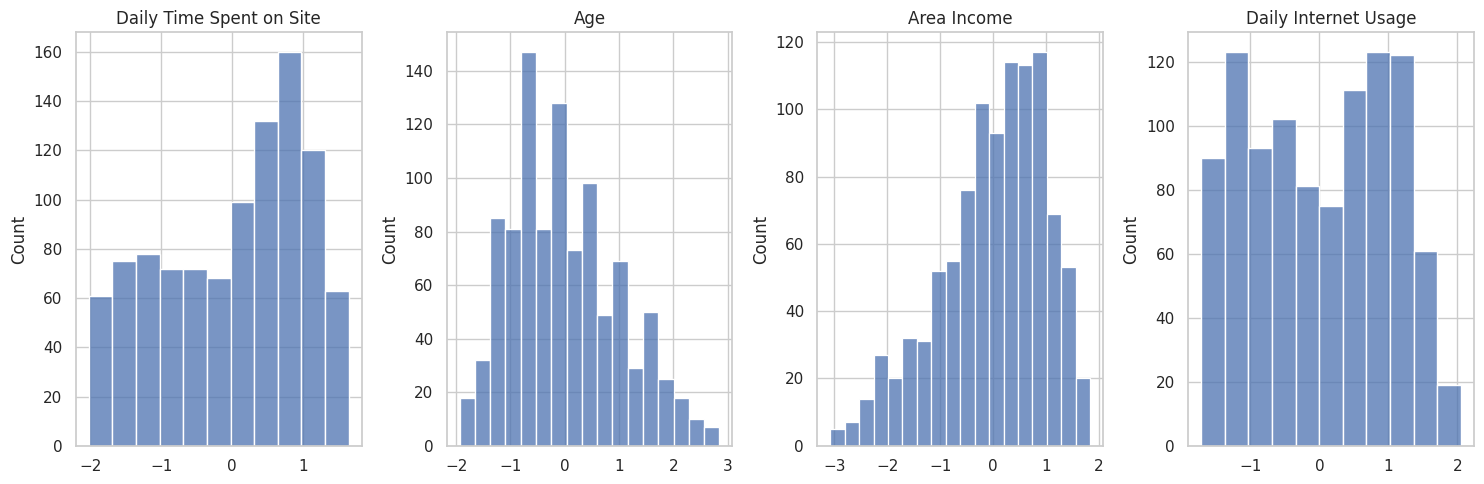

In [ ]:
# Set up the figure with multiple axes
fig, axs = plt.subplots(ncols=len(vars), figsize=(15,5))

# Plot the distribution of each variable on its own axis
for i, var in enumerate(vars):
    sns.histplot(data[var], ax=axs[i])
    axs[i].set_title(var)
    axs[i].set_xlabel('')

plt.tight_layout()
plt.show()

In [ ]:
# Split the DataFrame into features (X) and the target variable (y)
X = data.drop(['Clicked on Ad', 'Date'], axis=1)  # X contains all columns except 'clicked_on_ad' and 'Date'
y = data['Clicked on Ad']  # y contains the 'clicked_on_ad' column

# Split the data into training and testing sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# - X_train: Features for training
# - X_test: Features for testing
# - y_train: Target values for training
# - y_test: Target values for testing
# - test_size: Specifies the proportion of the dataset to include in the test split (in this case, 10%)
# - random_state: Sets a seed for random number generation to ensure reproducibility

In [ ]:
# Print the shapes of the training and testing sets to check their sizes
print('Shape of Training set:', X_train.shape)  # Display the shape of the training features
print('Shape of Testing set:', X_test.shape)    # Display the shape of the testing features

Shape of Training set: (800, 8)
Shape of Testing set: (200, 8)


## Model Creation with GridSearchCV

In [ ]:
# Create a logistic regression model
logistic_regression = LogisticRegression()

# Define a grid of hyperparameters to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],}  # Regularization type

# Create a grid search with cross-validation for hyperparameter tuning
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_logistic_regression = grid_search.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
# Evaluate the model on the test set
print("Best hyperparameters:", best_params)

Best hyperparameters: {'C': 0.1, 'penalty': 'l2'}


In [ ]:
# Checking for overfitting
# Print the training score (accuracy) of the Logistic Regression model
print('Logistic Regression Training accuracy:', round(best_logistic_regression.score(X_train, y_train), 5))

# Print the testing score (accuracy) of the Logistic Regression model
print('Logistic Regression Testing accuracy:', round(best_logistic_regression.score(X_test, y_test), 5))

Logistic Regression Training accuracy: 0.975
Logistic Regression Testing accuracy: 0.945


## Optimazation with Optuna

In [ ]:
!pip install optuna


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.1 MB/s eta 0:00:00


In [ ]:
import optuna

# Define the objective function for Optuna optimization
def objective(trial):
    params = {
        'random_state': 1,
        'penalty': trial.suggest_categorical('penalty', ['l1', 'l2']),
        'C': trial.suggest_loguniform('C', 1e-3, 10.0),
        'solver': 'saga',  # Change the solver to 'saga' for l1 penalty
    }

    model = LogisticRegression(**params)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000, show_progress_bar=True)

# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)


[I 2023-11-08 22:22:38,209] A new study created in memory with name: no-name-ec6f520b-8007-4b27-a486-cfcbf6564803


  0%|          | 0/1000 [00:00<?, ?it/s]

<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:22:38,303] Trial 0 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.18117726319568078}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:38,342] Trial 1 finished with value: 0.81 and parameters: {'penalty': 'l2', 'C': 0.0016069925413315742}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:38,396] Trial 2 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 4.550974002377749}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:38,436] Trial 3 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.009359741486136495}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:38,484] Trial 4 finished with value: 0.805 and parameters: {'penalty': 'l1', 'C': 0.04381382897937434}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:22:38,538] Trial 5 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.47786474513957805}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:38,631] Trial 6 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 3.9429807778950234}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:38,701] Trial 7 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 9.686375061835529}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:22:38,746] Trial 8 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.007345921600251524}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:38,815] Trial 9 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.23845400160770716}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:38,888] Trial 10 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.8945382125573227}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:38,938] Trial 11 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.0758236250918576}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:22:38,983] Trial 12 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.08754753111131718}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:39,031] Trial 13 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.2665857214059772}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:39,087] Trial 14 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.3311995028453534}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:39,131] Trial 15 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 9.011676782952216}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:22:39,186] Trial 16 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.8267059534645336}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:39,231] Trial 17 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.6730962819230453}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:39,285] Trial 18 finished with value: 0.815 and parameters: {'penalty': 'l1', 'C': 0.20608318525752461}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:39,336] Trial 19 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.260314054819834}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:39,380] Trial 20 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.10004717830757873}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:22:39,434] Trial 21 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.022217582278251404}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:39,488] Trial 22 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.017757079212947422}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:39,559] Trial 23 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.12001441358792543}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:22:39,657] Trial 24 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.389465659517232}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:39,739] Trial 25 finished with value: 0.815 and parameters: {'penalty': 'l2', 'C': 0.005301540442133166}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:39,799] Trial 26 finished with value: 0.805 and parameters: {'penalty': 'l1', 'C': 0.042223287451843075}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:39,843] Trial 27 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.17314964486424914}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:22:39,897] Trial 28 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.4739686161215723}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:39,943] Trial 29 finished with value: 0.815 and parameters: {'penalty': 'l2', 'C': 0.005572811313300598}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:39,991] Trial 30 finished with value: 0.805 and parameters: {'penalty': 'l2', 'C': 0.001153271327631607}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:40,054] Trial 31 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.499487735285924}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:22:40,109] Trial 32 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.675266132336021}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:40,165] Trial 33 finished with value: 0.81 and parameters: {'penalty': 'l2', 'C': 0.002198750464010096}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:40,219] Trial 34 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 4.339457103100851}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:40,274] Trial 35 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.06314448735890908}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:22:40,334] Trial 36 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.2762759867269182}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:40,391] Trial 37 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.15564786385807153}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:40,457] Trial 38 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 1.3481876848033676}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:40,520] Trial 39 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.3018512402742141}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:22:40,570] Trial 40 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.0453037841201257}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:40,627] Trial 41 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.0650879972934737}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:40,679] Trial 42 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 5.423861591218512}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:22:40,792] Trial 43 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 8.209944629161626}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:40,859] Trial 44 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 3.4147260587488457}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:40,942] Trial 45 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.2514249119396506}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:22:41,031] Trial 46 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.9282277527532792}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:41,124] Trial 47 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 5.8642520864576815}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:41,189] Trial 48 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 3.2260218700692143}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:22:41,279] Trial 49 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 9.29300297380565}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:41,370] Trial 50 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.26591564861917716}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:41,422] Trial 51 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 5.695207377340232}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:41,453] Trial 52 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.6333478913048158}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:22:41,498] Trial 53 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 3.7204043307817867}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:41,547] Trial 54 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.4869964189620792}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:41,583] Trial 55 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 7.280643155098017}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:41,627] Trial 56 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.9921045754822418}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:41,684] Trial 57 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 5.109943527094353}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:22:41,721] Trial 58 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 3.8610966186838986}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:41,763] Trial 59 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.6701405592271146}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:41,813] Trial 60 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 9.518075933072828}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:41,848] Trial 61 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 7.033836156548107}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:41,887] Trial 62 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.7904974144258627}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:22:41,928] Trial 63 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.22063317482697986}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:41,960] Trial 64 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.12090327365552662}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:42,006] Trial 65 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.011353865374711183}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:42,052] Trial 66 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.5785991343815329}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:42,086] Trial 67 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.38029277447527043}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:42,125] Trial 68 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.7698357126353228}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:22:42,185] Trial 69 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 4.590230935397174}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:42,222] Trial 70 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.08575789826363339}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:42,264] Trial 71 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.45330013940116404}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:42,318] Trial 72 finished with value: 0.81 and parameters: {'penalty': 'l1', 'C': 0.16262721857100687}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:42,356] Trial 73 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.3606138992810661}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:22:42,405] Trial 74 finished with value: 0.815 and parameters: {'penalty': 'l1', 'C': 0.21025625007470433}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:42,456] Trial 75 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 2.9633513350342673}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:42,489] Trial 76 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.5746189358854938}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:42,527] Trial 77 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 6.687863984828731}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:42,585] Trial 78 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 1.2046803549184109}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:22:42,621] Trial 79 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.2727291943180707}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:42,660] Trial 80 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 9.776980262025413}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:42,740] Trial 81 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 4.216439930731644}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:42,805] Trial 82 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.4524459662731294}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:22:42,861] Trial 83 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.7522151687096613}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:42,922] Trial 84 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 2.208906639456116}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:42,969] Trial 85 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.334059820430811}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:43,036] Trial 86 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 7.450902444430076}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:22:43,172] Trial 87 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 5.50427613055014}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:43,319] Trial 88 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.797168125074303}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:22:43,477] Trial 89 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.18570179156663194}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:43,578] Trial 90 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.24439679996001612}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:43,656] Trial 91 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.9592899780609834}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:22:43,738] Trial 92 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.3627852692418998}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:43,812] Trial 93 finished with value: 0.815 and parameters: {'penalty': 'l2', 'C': 0.004437041532878235}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:43,863] Trial 94 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 3.589169200787353}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:22:43,950] Trial 95 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.3689444592180524}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:44,007] Trial 96 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 4.966826124106434}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:44,082] Trial 97 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.9650531538787469}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:44,145] Trial 98 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 6.403959124121855}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:22:44,225] Trial 99 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.1311854999806972}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:44,289] Trial 100 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.294073928303079}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:44,356] Trial 101 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.09395151963082223}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:44,410] Trial 102 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.02709101796210771}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:22:44,480] Trial 103 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.18529159075291027}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:44,540] Trial 104 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.013641821475210682}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:44,619] Trial 105 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.15458856102300875}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:22:44,717] Trial 106 finished with value: 0.81 and parameters: {'penalty': 'l1', 'C': 0.07509839731414043}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:44,822] Trial 107 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.34405996926392046}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:44,876] Trial 108 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 4.309883739862}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:22:44,951] Trial 109 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.11218379183445515}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:45,050] Trial 110 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.511523304782644}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:45,143] Trial 111 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.9096073490574967}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:22:45,224] Trial 112 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.23725888638301412}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:45,327] Trial 113 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.765152750004996}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:22:45,445] Trial 114 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.4340149254077348}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:45,509] Trial 115 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.1808728886840107}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:45,569] Trial 116 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.7915290594127051}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:45,646] Trial 117 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 8.430952385862232}. Best is trial 0 with value: 0.82.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3


[I 2023-11-08 22:22:45,742] Trial 118 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.416575905532052}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:45,827] Trial 119 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.6003041448924704}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:22:45,898] Trial 120 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.6286168753634989}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:45,982] Trial 121 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.3043408451684974}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:46,054] Trial 122 finished with value: 0.815 and parameters: {'penalty': 'l1', 'C': 0.20974504065027613}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:22:46,135] Trial 123 finished with value: 0.715 and parameters: {'penalty': 'l1', 'C': 0.007608324592639066}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:46,200] Trial 124 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.6693471183013197}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:46,287] Trial 125 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.37865315019922613}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:22:46,353] Trial 126 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 3.3909340510601678}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:46,442] Trial 127 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.0871688939255266}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:46,511] Trial 128 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.49930988212744765}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:22:46,584] Trial 129 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.861648242387536}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:46,663] Trial 130 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.304015050675199}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:22:46,837] Trial 131 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 8.080190807585765}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:46,907] Trial 132 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 5.457952940198483}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:46,983] Trial 133 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 6.95692484609673}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:47,033] Trial 134 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.05672766588924193}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:22:47,122] Trial 135 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 9.540325840616873}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:47,190] Trial 136 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 4.018965515708508}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:47,272] Trial 137 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 6.2676040031103835}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:22:47,383] Trial 138 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.0249003379947972}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:47,489] Trial 139 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.1435255655656334}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:47,543] Trial 140 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.2501389709124577}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:22:47,630] Trial 141 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.017587467115345}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:47,693] Trial 142 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 4.994691605592486}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:47,782] Trial 143 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 3.326339358119825}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:22:47,879] Trial 144 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.843445076726816}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:47,951] Trial 145 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.5651115258418515}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:48,025] Trial 146 finished with value: 0.815 and parameters: {'penalty': 'l2', 'C': 0.0035756781104102635}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:22:48,119] Trial 147 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.17003142308648211}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:48,177] Trial 148 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.296500007204151}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:48,266] Trial 149 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.11351927169318071}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:22:48,357] Trial 150 finished with value: 0.8 and parameters: {'penalty': 'l1', 'C': 0.027483937274430312}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:48,454] Trial 151 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.6713205171915536}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:48,542] Trial 152 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.49426253420697425}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:22:48,641] Trial 153 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.8682437538329865}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:48,715] Trial 154 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 3.9917092522528175}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:22:48,872] Trial 155 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.3067423201295718}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:48,941] Trial 156 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.008601963888991104}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:49,027] Trial 157 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.41250767581671355}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:22:49,110] Trial 158 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 2.638009822913956}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:49,218] Trial 159 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.7441198839169652}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:49,280] Trial 160 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.5726492126132247}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:22:49,370] Trial 161 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.1656218075511366}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:49,447] Trial 162 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.2984670381069616}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:49,552] Trial 163 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.7722616476169932}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:22:49,634] Trial 164 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 7.777362058860713}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:49,712] Trial 165 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 9.71979047789786}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:49,809] Trial 166 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.91772410066092}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:22:49,900] Trial 167 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.2097738485115403}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:49,958] Trial 168 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 4.760471615092336}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:50,072] Trial 169 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.3025729948101605}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[I 2023-11-08 22:22:50,188] Trial 170 finished with value: 0.455 and parameters: {'penalty': 'l1', 'C': 0.0015241850752544257}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:50,331] Trial 171 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.08701112967447304}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:22:50,400] Trial 172 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.1397942602440552}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:50,465] Trial 173 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.1056599472354563}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:50,531] Trial 174 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.01758734368364621}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:22:50,643] Trial 175 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.03959792884834452}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:50,767] Trial 176 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.0029511055831284}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:22:50,890] Trial 177 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.2506409229081809}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:50,951] Trial 178 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.18148733076292636}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:51,030] Trial 179 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.35849243660194785}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:22:51,130] Trial 180 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 6.4286258440425925}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:51,214] Trial 181 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.060799297523375005}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:51,282] Trial 182 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.0069350720077454376}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:22:51,368] Trial 183 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.07117268230668278}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:51,440] Trial 184 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 3.4693858029673543}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:51,566] Trial 185 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.013552779841586602}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:22:51,667] Trial 186 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.12620290099974654}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:22:51,874] Trial 187 finished with value: 0.81 and parameters: {'penalty': 'l1', 'C': 0.09544688820246658}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:52,041] Trial 188 finished with value: 0.815 and parameters: {'penalty': 'l2', 'C': 0.005479639101688066}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:22:52,164] Trial 189 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.2988047913961981}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:52,296] Trial 190 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.15975632612320645}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:22:52,447] Trial 191 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.009631870336826791}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:52,564] Trial 192 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.01153940962053077}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:22:52,714] Trial 193 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.020068656273815672}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:52,843] Trial 194 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.526191144812479}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[I 2023-11-08 22:22:53,008] Trial 195 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 5.630816552365144}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:53,216] Trial 196 finished with value: 0.7 and parameters: {'penalty': 'l1', 'C': 0.007040297355618705}. Best is trial 0 with value: 0.82.

<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),



[I 2023-11-08 22:22:53,331] Trial 197 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.0325315664531218}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:22:53,489] Trial 198 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.04851407625830307}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:53,613] Trial 199 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 8.32404057276944}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:22:53,762] Trial 200 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 4.2528023812865685}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:53,899] Trial 201 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.10110452385793939}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:22:54,012] Trial 202 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.0828350334172779}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:54,144] Trial 203 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.009596407002318919}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:22:54,299] Trial 204 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.67562593799202}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:22:54,525] Trial 205 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 2.969651539017886}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:54,660] Trial 206 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.14047168369183824}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:22:54,797] Trial 207 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.03457640742400964}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:54,915] Trial 208 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.5124972953830587}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:22:55,087] Trial 209 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.4332032163299059}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:55,206] Trial 210 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.18660334812910945}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:22:55,331] Trial 211 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.3703740946737869}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:55,449] Trial 212 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.466994482751928}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:22:55,547] Trial 213 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.23810971544587436}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:55,653] Trial 214 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.26952592244856255}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:22:55,763] Trial 215 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.5590969823758632}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:55,875] Trial 216 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.018825649719660192}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:22:56,007] Trial 217 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.12146934677743791}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:56,098] Trial 218 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.0777269395653265}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:22:56,221] Trial 219 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.7889830825636556}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:56,339] Trial 220 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 1.9516274294647034}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:22:56,445] Trial 221 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.1594420412279775}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:56,510] Trial 222 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 9.809594777771832}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:22:56,656] Trial 223 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.22742525572797156}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:56,736] Trial 224 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.3333268847186469}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:56,803] Trial 225 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.18804068267388224}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:22:56,892] Trial 226 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.2766727581505701}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:56,945] Trial 227 finished with value: 0.815 and parameters: {'penalty': 'l2', 'C': 0.00633096758696573}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:57,035] Trial 228 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 7.265757397807779}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:22:57,125] Trial 229 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 3.770486488799277}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:57,228] Trial 230 finished with value: 0.725 and parameters: {'penalty': 'l1', 'C': 0.008724673781770147}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:57,304] Trial 231 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.5743186428542122}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:22:57,461] Trial 232 finished with value: 0.815 and parameters: {'penalty': 'l2', 'C': 0.004815191760958797}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:57,525] Trial 233 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.4538635540136726}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:57,637] Trial 234 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.023804803548058386}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:22:57,693] Trial 235 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.012656345166578542}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:57,805] Trial 236 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.11467759950167583}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:22:57,932] Trial 237 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.01577311856429516}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:58,079] Trial 238 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.066188443481813}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:22:58,158] Trial 239 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.9451521988180003}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:58,250] Trial 240 finished with value: 0.78 and parameters: {'penalty': 'l1', 'C': 0.012008636409082075}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:58,311] Trial 241 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.6659273457395998}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:22:58,449] Trial 242 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.41053864231796594}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:58,525] Trial 243 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.4831990808372897}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:58,611] Trial 244 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.32160739830800705}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:22:58,683] Trial 245 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.01614878304106021}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:58,791] Trial 246 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 5.011963184245798}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:58,850] Trial 247 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.03674871253960159}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:22:58,949] Trial 248 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 3.3460842774422916}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:59,020] Trial 249 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.5266601314222602}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:59,134] Trial 250 finished with value: 0.8 and parameters: {'penalty': 'l1', 'C': 0.03279211688998109}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:22:59,274] Trial 251 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.048097698218621504}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:59,380] Trial 252 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.024748149940143817}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:22:59,505] Trial 253 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.09281246157286928}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:59,636] Trial 254 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.010177262973302932}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:22:59,740] Trial 255 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.00772096971245745}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:59,806] Trial 256 finished with value: 0.81 and parameters: {'penalty': 'l1', 'C': 0.1400775208800704}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:22:59,902] Trial 257 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.210282094874041}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:00,003] Trial 258 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.526928924117755}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:00,141] Trial 259 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.3828810853170904}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:23:00,209] Trial 260 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.1035048741476479}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:00,332] Trial 261 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.05359272062128461}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:00,464] Trial 262 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 2.3548760973913643}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:00,554] Trial 263 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.7465829898454978}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:00,613] Trial 264 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 5.870852590813818}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:00,754] Trial 265 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.2858119583350803}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:00,847] Trial 266 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.743464545152885}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:00,908] Trial 267 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.5795227650717825}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:00,985] Trial 268 finished with value: 0.795 and parameters: {'penalty': 'l1', 'C': 0.020496947691359724}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:01,048] Trial 269 finished with value: 0.815 and parameters: {'penalty': 'l2', 'C': 0.005867057265642489}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:01,118] Trial 270 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.03133758833594308}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:01,209] Trial 271 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 7.360310748805601}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:01,281] Trial 272 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.15216578001958087}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:01,388] Trial 273 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.7384148339901369}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:01,460] Trial 274 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.07331094854711986}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:01,537] Trial 275 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.8821020512950948}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:01,609] Trial 276 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.039900050874694}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:01,750] Trial 277 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.2538486560202202}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:01,822] Trial 278 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.015229752465913616}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:01,898] Trial 279 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 8.765845797860052}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:02,031] Trial 280 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 4.591220049127548}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:02,125] Trial 281 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.639618250500841}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:02,185] Trial 282 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.40087741276591243}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:02,295] Trial 283 finished with value: 0.815 and parameters: {'penalty': 'l2', 'C': 0.0037189620895488364}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:02,369] Trial 284 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.11797955197757988}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:02,475] Trial 285 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 3.8874602908625064}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:02,624] Trial 286 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.01081104923401861}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:02,762] Trial 287 finished with value: 0.715 and parameters: {'penalty': 'l1', 'C': 0.007888018461989277}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[I 2023-11-08 22:23:02,930] Trial 288 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.1780538321432484}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:03,080] Trial 289 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.013233790972473479}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:03,180] Trial 290 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.3313265699643608}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:03,257] Trial 291 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.3392649536916477}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:03,344] Trial 292 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.5008234952578859}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:23:03,507] Trial 293 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 3.017054792454218}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:03,627] Trial 294 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.02227931042765918}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:23:03,747] Trial 295 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 6.280298726318166}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:03,911] Trial 296 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.0594718937910454}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:04,037] Trial 297 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.20871854620189798}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:04,108] Trial 298 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.02820755662481615}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:04,205] Trial 299 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.009142690400798943}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:23:04,315] Trial 300 finished with value: 0.645 and parameters: {'penalty': 'l1', 'C': 0.006092938277687697}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:04,429] Trial 301 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.06066733372450664}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:04,566] Trial 302 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.10951110031586528}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:04,659] Trial 303 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.04746014665552909}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:04,722] Trial 304 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.0138743249513527}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[I 2023-11-08 22:23:04,802] Trial 305 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.7913035679696444}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:04,970] Trial 306 finished with value: 0.81 and parameters: {'penalty': 'l1', 'C': 0.09275882159800312}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[I 2023-11-08 22:23:05,103] Trial 307 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.2930937452578698}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:05,272] Trial 308 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 8.341559255708265}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:05,378] Trial 309 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.4501211970260259}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:05,463] Trial 310 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.13330369576923026}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[I 2023-11-08 22:23:05,582] Trial 311 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.623977350176898}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:05,784] Trial 312 finished with value: 0.79 and parameters: {'penalty': 'l1', 'C': 0.017904174669165003}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:23:05,884] Trial 313 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.650842883545277}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:23:06,111] Trial 314 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.024158230006928887}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[I 2023-11-08 22:23:06,322] Trial 315 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.16202051274715834}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:06,496] Trial 316 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 9.915119258813418}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:06,653] Trial 317 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.1526324609579275}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:06,776] Trial 318 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 5.0860297981957885}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:23:06,932] Trial 319 finished with value: 0.595 and parameters: {'penalty': 'l1', 'C': 0.00509184243479686}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:07,069] Trial 320 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.45922900212092}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:23:07,222] Trial 321 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.23524007845825384}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:07,365] Trial 322 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 3.4431043966331734}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:23:07,512] Trial 323 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.3591209296203312}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:07,675] Trial 324 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.07668105659972144}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:23:07,907] Trial 325 finished with value: 0.785 and parameters: {'penalty': 'l1', 'C': 0.0144170723367478}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:08,048] Trial 326 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.5069034963504735}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[I 2023-11-08 22:23:08,221] Trial 327 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.00669965948313651}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:08,382] Trial 328 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 6.956430833232106}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[I 2023-11-08 22:23:08,593] Trial 329 finished with value: 0.81 and parameters: {'penalty': 'l2', 'C': 0.0028932957874148453}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:08,771] Trial 330 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.010192596800821753}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:08,943] Trial 331 finished with value: 0.8 and parameters: {'penalty': 'l1', 'C': 0.03097292545662603}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:09,088] Trial 332 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.04196331430802942}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[I 2023-11-08 22:23:09,236] Trial 333 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.020583420223427167}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:09,406] Trial 334 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.19314048018784236}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:23:09,581] Trial 335 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 3.965110393556068}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[I 2023-11-08 22:23:09,826] Trial 336 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.7441904721577924}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:09,975] Trial 337 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.8993767987165615}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:10,129] Trial 338 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.3905905929836861}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:10,257] Trial 339 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.008037090497385293}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:23:10,377] Trial 340 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.28149063906136873}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:10,504] Trial 341 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 3.0209270268462465}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:10,667] Trial 342 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.4055665406020228}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:10,781] Trial 343 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.0748281010007923}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:10,849] Trial 344 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 5.623611905282474}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:23:10,930] Trial 345 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.017083390260032666}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:11,071] Trial 346 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.13016248760838883}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[I 2023-11-08 22:23:11,181] Trial 347 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.094094192927026}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:11,347] Trial 348 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.16693259514061326}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:11,447] Trial 349 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.011794837142433737}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:11,527] Trial 350 finished with value: 0.81 and parameters: {'penalty': 'l1', 'C': 0.09697500891737156}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:11,618] Trial 351 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 4.532999478600976}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:23:11,725] Trial 352 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.6532272944270875}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:11,859] Trial 353 finished with value: 0.815 and parameters: {'penalty': 'l2', 'C': 0.004489134153669184}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:12,006] Trial 354 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.058186962871963045}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:12,084] Trial 355 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.3411902400472253}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:12,170] Trial 356 finished with value: 0.8 and parameters: {'penalty': 'l1', 'C': 0.026193692592823982}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:23:12,286] Trial 357 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 7.869049956333611}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:12,387] Trial 358 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.5162645393365101}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:12,513] Trial 359 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.2268656811088801}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:12,611] Trial 360 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.006931393062056273}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:12,698] Trial 361 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.03503085001887756}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C'

[I 2023-11-08 22:23:12,768] Trial 362 finished with value: 0.45 and parameters: {'penalty': 'l1', 'C': 0.0014145599352178516}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:12,845] Trial 363 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.8041447464326166}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:12,916] Trial 364 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.08239653877671652}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:13,003] Trial 365 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.6973455755612683}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:13,122] Trial 366 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 9.909948732535046}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:13,194] Trial 367 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.290394895701642}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:13,331] Trial 368 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.4121757823475921}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:13,411] Trial 369 finished with value: 0.81 and parameters: {'penalty': 'l1', 'C': 0.11027505902062779}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:13,507] Trial 370 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.4234268081914054}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:13,595] Trial 371 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.5996048297182448}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:13,705] Trial 372 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.008904219933138832}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:13,772] Trial 373 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.14906098714460414}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:13,877] Trial 374 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 6.236093470369942}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:13,959] Trial 375 finished with value: 0.785 and parameters: {'penalty': 'l1', 'C': 0.015106120659890242}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:14,054] Trial 376 finished with value: 0.815 and parameters: {'penalty': 'l2', 'C': 0.005771192998450907}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:23:14,136] Trial 377 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.8766191739394006}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:14,247] Trial 378 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 3.338974646488759}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:23:14,424] Trial 379 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.07146495769058771}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:23:14,654] Trial 380 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.3201088305538926}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:14,776] Trial 381 finished with value: 0.47 and parameters: {'penalty': 'l1', 'C': 0.0018814637149259636}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[I 2023-11-08 22:23:14,993] Trial 382 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.19648110797717477}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:15,158] Trial 383 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.7187245737629082}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:15,359] Trial 384 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.2579382064620836}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:15,511] Trial 385 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.011200639918334202}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:15,637] Trial 386 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.46282855803371953}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:15,724] Trial 387 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 1.201625782936196}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:15,798] Trial 388 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.04904123716646354}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:15,917] Trial 389 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 4.281368424679583}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:16,043] Trial 390 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.35598717294578225}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:16,112] Trial 391 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.548552646124243}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:16,188] Trial 392 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.017848247308048643}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:16,309] Trial 393 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.022267159025745647}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:23:16,448] Trial 394 finished with value: 0.785 and parameters: {'penalty': 'l1', 'C': 0.013833333938200635}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:16,579] Trial 395 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.04089370137605841}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:16,670] Trial 396 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.13099719904592208}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:16,750] Trial 397 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 7.314950408530552}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:16,842] Trial 398 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 5.117101426384092}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:16,929] Trial 399 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.09849251603308543}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:17,046] Trial 400 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 1.845086157931373}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:17,111] Trial 401 finished with value: 0.81 and parameters: {'penalty': 'l2', 'C': 0.002869723500349914}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:23:17,233] Trial 402 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.030480412710948774}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:17,341] Trial 403 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.0640301866207525}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),


[I 2023-11-08 22:23:17,500] Trial 404 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.0123980732875202}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:17,604] Trial 405 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.16409658157271784}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:17,736] Trial 406 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 3.6713083382400327}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:17,834] Trial 407 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.008486081885151249}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:17,901] Trial 408 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.20831448825905277}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:18,043] Trial 409 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 8.477752635603755}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:18,171] Trial 410 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.7558677993206897}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:18,301] Trial 411 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.5914765808625402}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:18,411] Trial 412 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.4422065180156715}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:18,487] Trial 413 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.7289169182268944}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:18,570] Trial 414 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.33245949690782967}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:18,661] Trial 415 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.111249028128271}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:18,761] Trial 416 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.026821108587484693}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:18,908] Trial 417 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.08246550459858068}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:18,981] Trial 418 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.25936505725473485}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:19,090] Trial 419 finished with value: 0.74 and parameters: {'penalty': 'l1', 'C': 0.010130564590047193}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:19,222] Trial 420 finished with value: 0.815 and parameters: {'penalty': 'l2', 'C': 0.005104834095352833}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:19,352] Trial 421 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 6.49332074580552}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:19,509] Trial 422 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.020238493938646487}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:19,592] Trial 423 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.597474659630395}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:19,630] Trial 424 finished with value: 0.805 and parameters: {'penalty': 'l2', 'C': 0.0011468622501618953}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:19,692] Trial 425 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 2.198573446322608}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:19,740] Trial 426 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 5.514174592619216}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:19,794] Trial 427 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.204391431262471}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:19,849] Trial 428 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.8621595889129847}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:19,915] Trial 429 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.4052907656378532}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:19,967] Trial 430 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.17447505655307557}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:20,032] Trial 431 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.5097452138697113}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:20,073] Trial 432 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 3.169694749013187}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:20,142] Trial 433 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.007331230346286463}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:20,202] Trial 434 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.311560096842951}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:20,267] Trial 435 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.054658739428827534}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:20,316] Trial 436 finished with value: 0.815 and parameters: {'penalty': 'l2', 'C': 0.006232893343788834}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:20,385] Trial 437 finished with value: 0.81 and parameters: {'penalty': 'l1', 'C': 0.12782688447273488}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:20,435] Trial 438 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 3.9921539742370826}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:20,497] Trial 439 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.04082193680604697}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:20,557] Trial 440 finished with value: 0.815 and parameters: {'penalty': 'l2', 'C': 0.00393852571995349}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:20,613] Trial 441 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.013388208836320574}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:20,671] Trial 442 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.24036344909076948}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:20,745] Trial 443 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.696558376009043}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:20,831] Trial 444 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 8.568014862804265}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:20,899] Trial 445 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.5047995160712202}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:20,972] Trial 446 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.03424478925618731}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:21,033] Trial 447 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.011230282353377037}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:21,087] Trial 448 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.14991896300531077}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:21,158] Trial 449 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 9.912291031160299}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:21,228] Trial 450 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 4.529634020082166}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:21,296] Trial 451 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.4603717686018345}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:21,375] Trial 452 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.0499218251357785}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:21,434] Trial 453 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.18538650103102788}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:21,488] Trial 454 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.0111779800255087}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:21,568] Trial 455 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.39203175187578415}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:21,649] Trial 456 finished with value: 0.81 and parameters: {'penalty': 'l1', 'C': 0.07035562140970868}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:21,727] Trial 457 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.08860158187307524}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:21,799] Trial 458 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.5352123521529788}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:21,871] Trial 459 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.024330157619062244}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:21,926] Trial 460 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.01749371247087539}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:22,001] Trial 461 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.2924246372526097}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:22,089] Trial 462 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 6.531522317709709}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:22,164] Trial 463 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.00816279752921561}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:22,235] Trial 464 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.11324439525995014}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:22,305] Trial 465 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.345518024597224}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:22,378] Trial 466 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.21523591229634956}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:22,447] Trial 467 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.9424387659488929}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:22,521] Trial 468 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 3.079976108993784}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:22,590] Trial 469 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.36832145809248656}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:22,649] Trial 470 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 7.429263151379145}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:22,717] Trial 471 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.01569207568819265}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:22,784] Trial 472 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.6477666565042081}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:22,854] Trial 473 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.053389325243778846}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:22,909] Trial 474 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.14397072451437645}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:22,988] Trial 475 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 5.209549358299012}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:23,058] Trial 476 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.4600650676509434}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:23,116] Trial 477 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.009364045689798345}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:23,170] Trial 478 finished with value: 0.815 and parameters: {'penalty': 'l2', 'C': 0.004795509043232366}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:23,233] Trial 479 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.0999037883690552}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:23,298] Trial 480 finished with value: 0.815 and parameters: {'penalty': 'l2', 'C': 0.006319010593714525}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:23,367] Trial 481 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 1.7894792338561467}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:23,435] Trial 482 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.8225645656134777}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:23,503] Trial 483 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 3.581612002557725}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:23,562] Trial 484 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.255911139826354}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:23,621] Trial 485 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.0125370819135074}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:23,685] Trial 486 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.501257591926005}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:23,766] Trial 487 finished with value: 0.8 and parameters: {'penalty': 'l1', 'C': 0.028995817389223806}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:23,823] Trial 488 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.3328727491104366}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:23,881] Trial 489 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.2198248758935761}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:23,938] Trial 490 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.5461012922714019}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:24,007] Trial 491 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.01927569402937764}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:24,063] Trial 492 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.18070511628865857}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:24,122] Trial 493 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.13468039126439096}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:24,173] Trial 494 finished with value: 0.465 and parameters: {'penalty': 'l1', 'C': 0.002417412592398283}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:24,244] Trial 495 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.06668853563776683}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:24,316] Trial 496 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 4.492179106931041}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:24,386] Trial 497 finished with value: 0.815 and parameters: {'penalty': 'l2', 'C': 0.0031557950968061172}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:24,458] Trial 498 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.08128985721647458}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:24,552] Trial 499 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.04090414874300745}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:24,635] Trial 500 finished with value: 0.71 and parameters: {'penalty': 'l1', 'C': 0.007522160294858687}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:24,724] Trial 501 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.22215439453150382}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:24,812] Trial 502 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.04641409170198155}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:24,887] Trial 503 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.7376248616859431}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:24,966] Trial 504 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.41351152801411994}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:25,036] Trial 505 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 8.406180174006327}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:25,108] Trial 506 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 1.5181214295390608}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:25,174] Trial 507 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.9828441835078157}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:25,233] Trial 508 finished with value: 0.815 and parameters: {'penalty': 'l2', 'C': 0.00403249055218665}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:25,310] Trial 509 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 5.597373435129223}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:25,385] Trial 510 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.28441612820151724}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:25,459] Trial 511 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.021884083657914347}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:25,543] Trial 512 finished with value: 0.735 and parameters: {'penalty': 'l1', 'C': 0.009850386948204474}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:25,627] Trial 513 finished with value: 0.805 and parameters: {'penalty': 'l2', 'C': 0.0010311917164935501}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:25,698] Trial 514 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.9976053720624458}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:25,768] Trial 515 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.11830494067987149}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:25,837] Trial 516 finished with value: 0.815 and parameters: {'penalty': 'l2', 'C': 0.004956008145050016}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:25,893] Trial 517 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.6022037578906584}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:25,947] Trial 518 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.9532283266163265}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:26,015] Trial 519 finished with value: 0.785 and parameters: {'penalty': 'l1', 'C': 0.014157877944992712}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:26,072] Trial 520 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.1641136517543724}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:26,131] Trial 521 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 3.799471943962869}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:26,185] Trial 522 finished with value: 0.81 and parameters: {'penalty': 'l2', 'C': 0.002110474346684304}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:26,244] Trial 523 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.45828282794966785}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:26,300] Trial 524 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 6.67361791917778}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:26,365] Trial 525 finished with value: 0.78 and parameters: {'penalty': 'l1', 'C': 0.011914008429026292}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:26,433] Trial 526 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.09278199862711277}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:26,498] Trial 527 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.059203761162882854}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:26,554] Trial 528 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.319486826742618}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:26,616] Trial 529 finished with value: 0.815 and parameters: {'penalty': 'l2', 'C': 0.005497725841721575}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:26,675] Trial 530 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.1135620281870904}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:26,741] Trial 531 finished with value: 0.815 and parameters: {'penalty': 'l1', 'C': 0.20261172407017394}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:26,802] Trial 532 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.031242714301893192}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:26,879] Trial 533 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.025768841790584772}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:26,940] Trial 534 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 9.886679599222127}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:26,998] Trial 535 finished with value: 0.815 and parameters: {'penalty': 'l2', 'C': 0.0034401104724635116}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:27,055] Trial 536 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.297377732067484}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:27,122] Trial 537 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.690823312755557}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:27,179] Trial 538 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.49632054071537457}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:27,240] Trial 539 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.683777667280388}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:27,297] Trial 540 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.25150495164881237}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:27,354] Trial 541 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.14113752823569697}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:27,410] Trial 542 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.8902740098085524}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:27,476] Trial 543 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.03568506933461679}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:27,547] Trial 544 finished with value: 0.785 and parameters: {'penalty': 'l1', 'C': 0.01673653258805802}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:27,615] Trial 545 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.3749484890394072}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:27,672] Trial 546 finished with value: 0.81 and parameters: {'penalty': 'l2', 'C': 0.0017143882075932714}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:27,736] Trial 547 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 4.492003066571494}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:27,795] Trial 548 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.3475061733637026}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:27,858] Trial 549 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.10090798112773079}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:27,920] Trial 550 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.8695679219382637}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:27,979] Trial 551 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 7.812519908953367}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:28,035] Trial 552 finished with value: 0.815 and parameters: {'penalty': 'l2', 'C': 0.006161837341462412}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:28,094] Trial 553 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.008239080001598223}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:28,150] Trial 554 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 5.732980054484549}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:28,210] Trial 555 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 3.5621614874074123}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:28,277] Trial 556 finished with value: 0.81 and parameters: {'penalty': 'l1', 'C': 0.04773626067742508}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:28,337] Trial 557 finished with value: 0.815 and parameters: {'penalty': 'l2', 'C': 0.004300796655743265}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:28,393] Trial 558 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.0766290045990824}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:28,462] Trial 559 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.1792506045370204}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:28,525] Trial 560 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.02127603368759086}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:28,602] Trial 561 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.5833426229630777}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:28,640] Trial 562 finished with value: 0.45 and parameters: {'penalty': 'l1', 'C': 0.0013296611268985303}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:28,708] Trial 563 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.44131511461600037}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:28,770] Trial 564 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.12532111068603743}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:28,839] Trial 565 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.5303948975113566}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:28,899] Trial 566 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.007110938753849235}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:28,968] Trial 567 finished with value: 0.81 and parameters: {'penalty': 'l2', 'C': 0.002581244600437545}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:29,034] Trial 568 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.3304407559487759}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:29,111] Trial 569 finished with value: 0.74 and parameters: {'penalty': 'l1', 'C': 0.010036880715579878}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:29,172] Trial 570 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.757708861046388}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:29,240] Trial 571 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.014286848767327913}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:29,304] Trial 572 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.0374702344815094}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:29,374] Trial 573 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 6.97669378062747}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:29,433] Trial 574 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.8855621903582547}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:29,513] Trial 575 finished with value: 0.815 and parameters: {'penalty': 'l1', 'C': 0.21085573642750455}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:29,575] Trial 576 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.28407088959095417}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:29,647] Trial 577 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 9.965655848743049}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:29,703] Trial 578 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 4.079974534667521}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:29,774] Trial 579 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.16086009863767295}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:29,833] Trial 580 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.06446040500847212}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:29,908] Trial 581 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 1.278099358894709}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:29,975] Trial 582 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.5519311217994446}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:30,041] Trial 583 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.01109501099389922}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:30,101] Trial 584 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.3710060567226472}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:30,174] Trial 585 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 5.115479707517942}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:30,242] Trial 586 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.10519727878115441}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:30,321] Trial 587 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.646400646370784}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:30,383] Trial 588 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 3.2819591260763397}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:30,449] Trial 589 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.25232909393411085}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:30,506] Trial 590 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.02663147289344843}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:30,568] Trial 591 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.152597966934522}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:30,630] Trial 592 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.016921894349265457}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:30,700] Trial 593 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 8.306532388400305}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:30,765] Trial 594 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.46984647353215336}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:30,826] Trial 595 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.03837294378922328}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:30,882] Trial 596 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.5000907858065797}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:30,943] Trial 597 finished with value: 0.815 and parameters: {'penalty': 'l2', 'C': 0.0038112050416642088}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:31,000] Trial 598 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.12513420675669776}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:31,064] Trial 599 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.008842054810095569}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:31,127] Trial 600 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.8078306037788355}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:31,188] Trial 601 finished with value: 0.815 and parameters: {'penalty': 'l2', 'C': 0.0056622472259501315}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:31,253] Trial 602 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 6.118330000948433}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:31,313] Trial 603 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.05423078544230503}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:31,379] Trial 604 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.8295486592085686}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:31,444] Trial 605 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.21581520301844004}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:31,505] Trial 606 finished with value: 0.785 and parameters: {'penalty': 'l1', 'C': 0.013050915621386026}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:31,574] Trial 607 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.08425816736985518}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:31,635] Trial 608 finished with value: 0.81 and parameters: {'penalty': 'l2', 'C': 0.003032934324915138}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:31,705] Trial 609 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.14784139548916672}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:31,763] Trial 610 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.020310882665482123}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:31,824] Trial 611 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.1244731975362554}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:31,879] Trial 612 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.30544683923861254}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:31,943] Trial 613 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.028468227627690534}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:32,001] Trial 614 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.661875020441493}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:32,072] Trial 615 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.4167194661682423}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:32,129] Trial 616 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 4.383474816840445}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:32,194] Trial 617 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.6372952809475193}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:32,253] Trial 618 finished with value: 0.81 and parameters: {'penalty': 'l2', 'C': 0.0020287410351180093}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:32,322] Trial 619 finished with value: 0.7 and parameters: {'penalty': 'l1', 'C': 0.007002203450211934}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:32,375] Trial 620 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.9094376534749615}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:32,447] Trial 621 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.4958958872850415}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:32,503] Trial 622 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 6.98050455442948}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:32,566] Trial 623 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.19080843436117859}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:32,618] Trial 624 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.10668296373421898}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:32,689] Trial 625 finished with value: 0.81 and parameters: {'penalty': 'l1', 'C': 0.07493316234149892}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:32,767] Trial 626 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 3.4824510170207716}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:32,827] Trial 627 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.3341643746257357}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:32,883] Trial 628 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.34829758287833223}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:32,947] Trial 629 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.24961899084409558}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:33,008] Trial 630 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.01748318942138331}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:33,077] Trial 631 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 5.231768232481883}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:33,131] Trial 632 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.036505906125511446}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:33,195] Trial 633 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.1542348523237556}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:33,256] Trial 634 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.00954386477117171}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:33,320] Trial 635 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.012402819735574933}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:33,380] Trial 636 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 8.010984326177473}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:33,449] Trial 637 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 1.4236508811824027}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:33,509] Trial 638 finished with value: 0.815 and parameters: {'penalty': 'l2', 'C': 0.004479256624625021}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:33,573] Trial 639 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.5660208721611533}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:33,632] Trial 640 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.7529485691103207}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:33,702] Trial 641 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.08842669363539761}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:33,775] Trial 642 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.0289476776006214}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:33,850] Trial 643 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.78315665744822}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:33,910] Trial 644 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.4092840653072263}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:33,979] Trial 645 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.056217843369948}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:34,032] Trial 646 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.04386154461757212}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:34,100] Trial 647 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.0070866255712734045}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:34,167] Trial 648 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.8041934713702372}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:34,241] Trial 649 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.2885457824857973}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:34,305] Trial 650 finished with value: 0.81 and parameters: {'penalty': 'l1', 'C': 0.1975569531650468}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:34,369] Trial 651 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.022653024537186112}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:34,426] Trial 652 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.13005681424513124}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:34,489] Trial 653 finished with value: 0.81 and parameters: {'penalty': 'l2', 'C': 0.0026648895957284615}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:34,542] Trial 654 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 4.262687787377083}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:34,607] Trial 655 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.2838752498215789}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:34,675] Trial 656 finished with value: 0.81 and parameters: {'penalty': 'l1', 'C': 0.06363471159822433}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:34,739] Trial 657 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 8.586796240107912}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:34,798] Trial 658 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.5186742904476593}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:34,876] Trial 659 finished with value: 0.815 and parameters: {'penalty': 'l2', 'C': 0.005444263732183684}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:34,934] Trial 660 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.030819814990953005}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:35,002] Trial 661 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.12429392944886}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:35,063] Trial 662 finished with value: 0.785 and parameters: {'penalty': 'l1', 'C': 0.014461495102757942}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:35,127] Trial 663 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.011178614933181728}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:35,187] Trial 664 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.11546879240976433}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:35,253] Trial 665 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.23502352561664874}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:35,311] Trial 666 finished with value: 0.805 and parameters: {'penalty': 'l2', 'C': 0.0010319827264779285}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:35,374] Trial 667 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.024617032869168637}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:35,432] Trial 668 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.16704538365547528}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:35,500] Trial 669 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.37110544848450727}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:35,558] Trial 670 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 3.3633530717854545}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:35,621] Trial 671 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.6732001682235128}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:35,680] Trial 672 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 6.284781643322058}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:35,742] Trial 673 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.9659116324308236}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:35,799] Trial 674 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.00804837699807287}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:35,892] Trial 675 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.46663615140891335}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:35,959] Trial 676 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.08934859645867028}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:36,024] Trial 677 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.03376676208762386}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:36,084] Trial 678 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 9.80976066795999}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:36,168] Trial 679 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.534013563623801}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:36,251] Trial 680 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.04818124936002006}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:36,330] Trial 681 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 5.108006665937962}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:36,404] Trial 682 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.7996174536552548}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:36,481] Trial 683 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.31274140624787916}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:36,546] Trial 684 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.0704418131239946}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:36,617] Trial 685 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.0172219552257208}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:36,684] Trial 686 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.14031306582210334}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:36,756] Trial 687 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 3.890398382447023}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:36,832] Trial 688 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.5666697139214574}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:36,903] Trial 689 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.18130692952565014}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:36,982] Trial 690 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.5869075173717623}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:37,063] Trial 691 finished with value: 0.815 and parameters: {'penalty': 'l2', 'C': 0.003823796762251348}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:37,138] Trial 692 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.10178056540743989}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:37,208] Trial 693 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.1140708897596854}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:37,258] Trial 694 finished with value: 0.47 and parameters: {'penalty': 'l1', 'C': 0.0019900627278560392}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:37,343] Trial 695 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 7.196156479335395}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:37,415] Trial 696 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.008936861340367695}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:37,493] Trial 697 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.40874367379235543}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:37,561] Trial 698 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.02122413140221748}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:37,634] Trial 699 finished with value: 0.805 and parameters: {'penalty': 'l2', 'C': 0.0013919849609140677}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:37,703] Trial 700 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.2518918814335436}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:37,773] Trial 701 finished with value: 0.815 and parameters: {'penalty': 'l2', 'C': 0.004820973351666986}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:37,836] Trial 702 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.0059476716534856}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:37,898] Trial 703 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.34447052628904745}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:37,960] Trial 704 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 5.974456388820781}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:38,047] Trial 705 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.010953595640303605}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:38,116] Trial 706 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 3.0424576459796624}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:38,183] Trial 707 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.014960428797903269}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:38,264] Trial 708 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.006883686354933055}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:38,339] Trial 709 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.21199405947755062}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:38,400] Trial 710 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 4.6757857260949995}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:38,468] Trial 711 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.7003180132347129}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:38,537] Trial 712 finished with value: 0.81 and parameters: {'penalty': 'l1', 'C': 0.11489160735865343}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:38,601] Trial 713 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.3707148996180172}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:38,661] Trial 714 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.5062142547235864}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:38,729] Trial 715 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.8807170195792448}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:38,790] Trial 716 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.16470927228790744}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:38,863] Trial 717 finished with value: 0.81 and parameters: {'penalty': 'l2', 'C': 0.0017883563183750035}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:38,922] Trial 718 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 9.940249216478449}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:38,997] Trial 719 finished with value: 0.655 and parameters: {'penalty': 'l1', 'C': 0.0061915937819129125}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:39,062] Trial 720 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.2761389680289107}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:39,129] Trial 721 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 3.5369364049321277}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:39,192] Trial 722 finished with value: 0.815 and parameters: {'penalty': 'l2', 'C': 0.003416579760577897}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:39,262] Trial 723 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.08391792881462572}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:39,323] Trial 724 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.026111334678745535}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:39,395] Trial 725 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 2.5679755125603005}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:39,460] Trial 726 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.2038675703960686}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:39,524] Trial 727 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 8.01770054914714}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:39,585] Trial 728 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.019830803657166957}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:39,649] Trial 729 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.41258475555950175}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:39,710] Trial 730 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.03883307016240772}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:39,784] Trial 731 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.6152509003236847}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:39,844] Trial 732 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.13735003600692536}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:39,916] Trial 733 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.012653879239302961}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:40,001] Trial 734 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.05417642767199974}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:40,093] Trial 735 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.009508598199469564}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:40,178] Trial 736 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.32614535622068924}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:40,257] Trial 737 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 5.728962802362771}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:40,319] Trial 738 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.23757300934872477}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:40,403] Trial 739 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.029284330792158204}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:40,481] Trial 740 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.044936415321853974}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:40,571] Trial 741 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.7777084132743592}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:40,651] Trial 742 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.9270452772555524}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:40,737] Trial 743 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 3.9439889709734683}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:40,813] Trial 744 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.19493914372500806}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:40,893] Trial 745 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.980462699818102}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:40,963] Trial 746 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.06408596084612844}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:41,044] Trial 747 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.4966759973939751}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:41,116] Trial 748 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.008353636337503325}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:41,186] Trial 749 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.3179692081174754}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:41,267] Trial 750 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 7.094761007333311}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:41,341] Trial 751 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.1010778867668781}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:41,422] Trial 752 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.016013304527355277}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:41,506] Trial 753 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.7318050641202964}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:41,573] Trial 754 finished with value: 0.81 and parameters: {'penalty': 'l2', 'C': 0.0027047213159525595}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:41,648] Trial 755 finished with value: 0.815 and parameters: {'penalty': 'l2', 'C': 0.005228492728550086}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:41,722] Trial 756 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 4.887217242110974}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:41,787] Trial 757 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.12923106533723802}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:41,847] Trial 758 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.6294989509462514}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:41,913] Trial 759 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.36640751099325913}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:41,980] Trial 760 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.034559000861884605}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:42,050] Trial 761 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.1061734815833226}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:42,093] Trial 762 finished with value: 0.46 and parameters: {'penalty': 'l1', 'C': 0.001631984390395168}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:42,158] Trial 763 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.1649457312087844}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:42,221] Trial 764 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.0189137590893841}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:42,301] Trial 765 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.46394015350177226}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:42,363] Trial 766 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.28279821365248786}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:42,429] Trial 767 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.0544105529401753}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:42,501] Trial 768 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.5908066046516461}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:42,567] Trial 769 finished with value: 0.815 and parameters: {'penalty': 'l2', 'C': 0.006065153118045682}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:42,631] Trial 770 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.8058603974043171}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:42,693] Trial 771 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.01243921935804957}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:42,756] Trial 772 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 8.08901419020767}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:42,823] Trial 773 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.07665178390664897}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:42,886] Trial 774 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.354892529124874}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:42,966] Trial 775 finished with value: 0.495 and parameters: {'penalty': 'l1', 'C': 0.0033289878213130144}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:43,037] Trial 776 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.2236704942641881}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:43,104] Trial 777 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.02305191734631209}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:43,166] Trial 778 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.010635338652034297}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:43,228] Trial 779 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.007469903119291072}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:43,301] Trial 780 finished with value: 0.815 and parameters: {'penalty': 'l2', 'C': 0.004108974279619139}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:43,381] Trial 781 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 3.9377033434609743}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:43,441] Trial 782 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.3881220530620071}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:43,510] Trial 783 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.10857913571485664}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:43,573] Trial 784 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 3.0652441725355377}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:43,640] Trial 785 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.6691800706890999}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:43,706] Trial 786 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 6.130833683633316}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C'

[I 2023-11-08 22:23:43,758] Trial 787 finished with value: 0.45 and parameters: {'penalty': 'l1', 'C': 0.001152623906579516}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:43,819] Trial 788 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.06632595819449308}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:43,884] Trial 789 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.04293857057697213}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:43,945] Trial 790 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.17487648025447863}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:44,012] Trial 791 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.3058739267137065}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:44,079] Trial 792 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.1428079395760464}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:44,151] Trial 793 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.9395283752804653}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:44,213] Trial 794 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.01470649466816444}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:44,290] Trial 795 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.7768079241033623}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:44,372] Trial 796 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.09397071871032245}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:44,451] Trial 797 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 8.67510881669258}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:44,516] Trial 798 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.5753817927218979}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:44,584] Trial 799 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.4556925793038182}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:44,657] Trial 800 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 2.6522395966181396}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:44,721] Trial 801 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.20470021573022246}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:44,780] Trial 802 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 9.938283297464972}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:44,844] Trial 803 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.025648433202280742}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:44,905] Trial 804 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.262335258975612}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:44,976] Trial 805 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 4.787989602403502}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:45,049] Trial 806 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 1.2397481298802744}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:45,121] Trial 807 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.12077934834286841}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:45,186] Trial 808 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.05590744005702449}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:45,257] Trial 809 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 7.210614365933834}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:45,318] Trial 810 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.008164453577168601}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:45,384] Trial 811 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 3.3841130822257224}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:45,454] Trial 812 finished with value: 0.795 and parameters: {'penalty': 'l1', 'C': 0.019566821700552857}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:45,526] Trial 813 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.08097442679615874}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:45,591] Trial 814 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.3690546038282681}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:45,660] Trial 815 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.029823289437280347}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:45,718] Trial 816 finished with value: 0.805 and parameters: {'penalty': 'l2', 'C': 0.001449682384045086}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:45,781] Trial 817 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.1843874510431514}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:45,849] Trial 818 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.5355332274265803}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:45,916] Trial 819 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.01016805262348469}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:45,980] Trial 820 finished with value: 0.815 and parameters: {'penalty': 'l2', 'C': 0.00508263083322031}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:46,042] Trial 821 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.8196469237254025}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:46,108] Trial 822 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.0334784055102193}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:46,183] Trial 823 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.048831655432837476}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:46,251] Trial 824 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.1536487014066549}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:46,322] Trial 825 finished with value: 0.69 and parameters: {'penalty': 'l1', 'C': 0.006683574587938293}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:46,382] Trial 826 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 5.440111745806641}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:46,455] Trial 827 finished with value: 0.81 and parameters: {'penalty': 'l2', 'C': 0.0020160158812851316}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:46,515] Trial 828 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.012948536882359151}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:46,580] Trial 829 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 4.1075782688041995}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:46,640] Trial 830 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.4411090009814959}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:46,711] Trial 831 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.33228732879145884}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:46,771] Trial 832 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.21879727251156317}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:46,839] Trial 833 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.4493222263459011}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:46,901] Trial 834 finished with value: 0.81 and parameters: {'penalty': 'l2', 'C': 0.0022978351286860573}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:46,965] Trial 835 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.7144391230864215}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:47,026] Trial 836 finished with value: 0.815 and parameters: {'penalty': 'l2', 'C': 0.004334194779043705}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:47,101] Trial 837 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 2.6214567990164768}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:47,160] Trial 838 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 6.713650102673956}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:47,238] Trial 839 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.03724526179579201}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:47,306] Trial 840 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.28349242882186365}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:47,375] Trial 841 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.552650968465058}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:47,441] Trial 842 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.09980217988344216}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:47,530] Trial 843 finished with value: 0.81 and parameters: {'penalty': 'l1', 'C': 0.13038208065947626}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:47,594] Trial 844 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 3.2818157152428022}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:47,662] Trial 845 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.18247779196417424}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:47,724] Trial 846 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.5401522474533673}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:47,795] Trial 847 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.017739138652101867}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:47,862] Trial 848 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.9632828862141085}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:47,928] Trial 849 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.0764719810905053}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:47,976] Trial 850 finished with value: 0.455 and parameters: {'penalty': 'l1', 'C': 0.0012465841022430493}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:48,047] Trial 851 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.1375086764439057}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:48,113] Trial 852 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.009478345237409133}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:48,180] Trial 853 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.02174689836522564}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:48,243] Trial 854 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 4.571165210215187}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:48,308] Trial 855 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.03325140460079265}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:48,376] Trial 856 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.4232357890221807}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:48,443] Trial 857 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.23620507810619729}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:48,505] Trial 858 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 8.479327033873304}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:48,583] Trial 859 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.007699209296951768}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:48,643] Trial 860 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.6744833857385794}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:48,706] Trial 861 finished with value: 0.815 and parameters: {'penalty': 'l2', 'C': 0.005922986766147196}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:48,773] Trial 862 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.8565253660849049}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:48,838] Trial 863 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.15425292473599497}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:48,899] Trial 864 finished with value: 0.81 and parameters: {'penalty': 'l2', 'C': 0.0026320090400346295}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:48,965] Trial 865 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.011578304620770568}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:49,029] Trial 866 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.3084714682237717}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:49,095] Trial 867 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.7210717979835604}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:49,168] Trial 868 finished with value: 0.81 and parameters: {'penalty': 'l1', 'C': 0.11355568281992726}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:49,233] Trial 869 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.026162778853794026}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:49,297] Trial 870 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.01513349473890725}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:49,362] Trial 871 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.06780225332081767}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:49,424] Trial 872 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.041496514004723435}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:49,490] Trial 873 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 3.746572969836506}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:49,551] Trial 874 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 5.928035650203933}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:49,642] Trial 875 finished with value: 0.81 and parameters: {'penalty': 'l1', 'C': 0.09014826465602557}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:49,703] Trial 876 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.5044321219926278}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:49,768] Trial 877 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.19170115250007477}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:49,828] Trial 878 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.3691955460753167}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:49,898] Trial 879 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 9.989887819182279}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:49,960] Trial 880 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.2211420761324112}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:50,033] Trial 881 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 2.274680457483161}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:50,094] Trial 882 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.8611042566256184}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:50,162] Trial 883 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.5971696916339455}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:50,224] Trial 884 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.035213234443373}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:50,295] Trial 885 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.016943781143941287}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:50,356] Trial 886 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 7.555694362999855}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:50,428] Trial 887 finished with value: 0.81 and parameters: {'penalty': 'l1', 'C': 0.14500268434037056}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:50,493] Trial 888 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.24512593951963943}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:50,557] Trial 889 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.06098304853948313}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:50,617] Trial 890 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.4622675547085646}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:50,700] Trial 891 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.008776118455999621}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:50,763] Trial 892 finished with value: 0.815 and parameters: {'penalty': 'l2', 'C': 0.0038132217655711216}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:50,833] Trial 893 finished with value: 0.485 and parameters: {'penalty': 'l1', 'C': 0.0032476567057817653}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:50,893] Trial 894 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 5.052587917158579}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:50,959] Trial 895 finished with value: 0.815 and parameters: {'penalty': 'l2', 'C': 0.005068575896094942}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:51,022] Trial 896 finished with value: 0.81 and parameters: {'penalty': 'l2', 'C': 0.0015419451016582938}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:51,093] Trial 897 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.02245352446791368}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:51,156] Trial 898 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.04851547831852243}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:51,237] Trial 899 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.7823199472589139}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:51,301] Trial 900 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.4047348083327358}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:51,367] Trial 901 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.11296895927298618}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:51,427] Trial 902 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.029992397124768817}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:51,495] Trial 903 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.012935470905204126}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:51,577] Trial 904 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.17236408015039972}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:51,651] Trial 905 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.0069062868876792515}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:51,735] Trial 906 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 3.5843066826215515}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:51,825] Trial 907 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.34088157130770863}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:51,891] Trial 908 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.466628567802308}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:51,981] Trial 909 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.6466634531073149}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:52,052] Trial 910 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.9857369645257443}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:52,128] Trial 911 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 6.303688255044382}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:52,222] Trial 912 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.27205171588928023}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:52,320] Trial 913 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.09309958374604073}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:52,408] Trial 914 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.12595382440176167}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:52,492] Trial 915 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.010235273257651096}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:52,557] Trial 916 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.21417268666824846}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:52,626] Trial 917 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.9175385278303042}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:52,702] Trial 918 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 1.7333404799192698}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:52,772] Trial 919 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.2215720178978744}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:52,853] Trial 920 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.014922055477921714}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:52,924] Trial 921 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 4.666080991513428}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:52,988] Trial 922 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.03543810114260504}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:53,057] Trial 923 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.539956734304637}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:53,131] Trial 924 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 1.2173234082133144}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:53,202] Trial 925 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.07444509488503737}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:53,270] Trial 926 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 8.016611227803647}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:53,346] Trial 927 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 4.314409360128037}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:53,414] Trial 928 finished with value: 0.815 and parameters: {'penalty': 'l2', 'C': 0.00563420599633113}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:53,484] Trial 929 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.052211233243862315}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:53,555] Trial 930 finished with value: 0.81 and parameters: {'penalty': 'l2', 'C': 0.0017216324603008698}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:53,639] Trial 931 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.30923310290494915}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:53,705] Trial 932 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.43083826308438444}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:53,776] Trial 933 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.7334120018906555}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:53,842] Trial 934 finished with value: 0.81 and parameters: {'penalty': 'l2', 'C': 0.002351868818333514}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:53,927] Trial 935 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.18128769944193932}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:53,994] Trial 936 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.01841581012755497}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:54,074] Trial 937 finished with value: 0.81 and parameters: {'penalty': 'l1', 'C': 0.14470945896835188}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:54,149] Trial 938 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.008273679219634653}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:54,220] Trial 939 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.830446560468863}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:54,289] Trial 940 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 5.805893330429848}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:54,360] Trial 941 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.010693038936806249}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:54,430] Trial 942 finished with value: 0.815 and parameters: {'penalty': 'l2', 'C': 0.004385568338246977}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:54,508] Trial 943 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.2512355192814737}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:54,574] Trial 944 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.377380246494612}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:54,645] Trial 945 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.9374225310363151}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:54,711] Trial 946 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.029583922823775647}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:54,785] Trial 947 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.10124017889676379}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:54,855] Trial 948 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.6204635015656467}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:54,936] Trial 949 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.34701984866548746}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:55,008] Trial 950 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.02386433081556111}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:55,078] Trial 951 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 9.94812261896913}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:55,143] Trial 952 finished with value: 0.81 and parameters: {'penalty': 'l2', 'C': 0.002970750777795993}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:55,213] Trial 953 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.03980234196531592}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:55,297] Trial 954 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 3.4180867604071756}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:55,367] Trial 955 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.630457811182269}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:55,443] Trial 956 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 2.372449958801317}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:55,516] Trial 957 finished with value: 0.815 and parameters: {'penalty': 'l2', 'C': 0.006471815647710299}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:55,582] Trial 958 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.19724950166194363}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:55,652] Trial 959 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 7.040235462602351}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:55,717] Trial 960 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.48342999785694296}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:55,792] Trial 961 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.012705156998074537}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:55,892] Trial 962 finished with value: 0.81 and parameters: {'penalty': 'l1', 'C': 0.08780360553441241}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:55,980] Trial 963 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.0715669246819355}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:56,060] Trial 964 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.11848916664511834}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:56,128] Trial 965 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 4.033259117086502}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:56,208] Trial 966 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.019738747159255804}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:56,303] Trial 967 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.16061277327462328}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:56,408] Trial 968 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 1.9578868614055729}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:56,487] Trial 969 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.39873479467716155}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:56,562] Trial 970 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.2313867723680423}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:56,653] Trial 971 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.05495725259530569}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:56,731] Trial 972 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.7909327663429848}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:56,820] Trial 973 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.068082415263947}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:56,907] Trial 974 finished with value: 0.7 and parameters: {'penalty': 'l1', 'C': 0.0072571439242432745}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:56,996] Trial 975 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 8.035658440649028}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:57,086] Trial 976 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.009029833857577394}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:57,177] Trial 977 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.02544353793408133}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:57,266] Trial 978 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.2911570012150837}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:57,343] Trial 979 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 5.862738602179763}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:57,419] Trial 980 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.015295997422890683}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:57,483] Trial 981 finished with value: 0.455 and parameters: {'penalty': 'l1', 'C': 0.0011178536571334735}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:57,556] Trial 982 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.5524837302765505}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:57,623] Trial 983 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 2.7817901886928564}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:57,686] Trial 984 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.6883152854724538}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:57,751] Trial 985 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 5.17236279406985}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:57,815] Trial 986 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.045487624021020696}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:57,891] Trial 987 finished with value: 0.81 and parameters: {'penalty': 'l1', 'C': 0.13423809100985232}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:57,954] Trial 988 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.0794589367553232}. Best is trial 0 with value: 0.82.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:3

[I 2023-11-08 22:23:58,024] Trial 989 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.3794756928093269}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:58,090] Trial 990 finished with value: 0.815 and parameters: {'penalty': 'l2', 'C': 0.004759190499164188}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:58,158] Trial 991 finished with value: 0.81 and parameters: {'penalty': 'l2', 'C': 0.002239032605729186}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:58,223] Trial 992 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.3204688515278562}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:58,297] Trial 993 finished with value: 0.82 and parameters: {'penalty': 'l1', 'C': 0.4609461594161843}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:58,361] Trial 994 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 1.606636830682308}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:58,431] Trial 995 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.0112213970948847}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:58,497] Trial 996 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.9647268896256117}. Best is trial 0 with value: 0.82.


<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-45-cca0d28fc666>:8: FutureWarning: suggest_loguniform h

[I 2023-11-08 22:23:58,564] Trial 997 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.20554811463526976}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:58,629] Trial 998 finished with value: 0.82 and parameters: {'penalty': 'l2', 'C': 0.034007883411272456}. Best is trial 0 with value: 0.82.
[I 2023-11-08 22:23:58,702] Trial 999 finished with value: 0.81 and parameters: {'penalty': 'l1', 'C': 0.10539964422250545}. Best is trial 0 with value: 0.82.
Best Hyperparameters: {'penalty': 'l2', 'C': 0.18117726319568078}


In [ ]:
# Create and train the LogisticRegression model with the best hyperparameters
best_model = LogisticRegression(**best_params)
best_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.18117726319568078)

## Model Evaluating

In [ ]:
# Make predictions on the training and test sets
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate metrics for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred)

# Calculate metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

# Create a table to display the metrics
metrics_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Train Set': [train_accuracy, train_precision, train_recall, train_f1, train_roc_auc],
    'Test Set': [test_accuracy, test_precision, test_recall, test_f1, test_roc_auc]
})

# Set the 'Metric' column as the index
metrics_table = metrics_table.set_index('Metric')

# Define a custom styling function to apply color and background to the cells
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: cyan; color: black; font-weight: bold' if v else '' for v in is_max]

# Apply the custom styling to the metrics table
styled_metrics_table = metrics_table.style.apply(highlight_max, axis=1)

# Display the styled metrics table
display(styled_metrics_table)


,Train Set,Test Set
Metric,,
Accuracy,0.975000,0.940000
Precision,0.986807,0.962617
Recall,0.961440,0.927928
F1 Score,0.973958,0.944954
ROC AUC,0.974637,0.941492


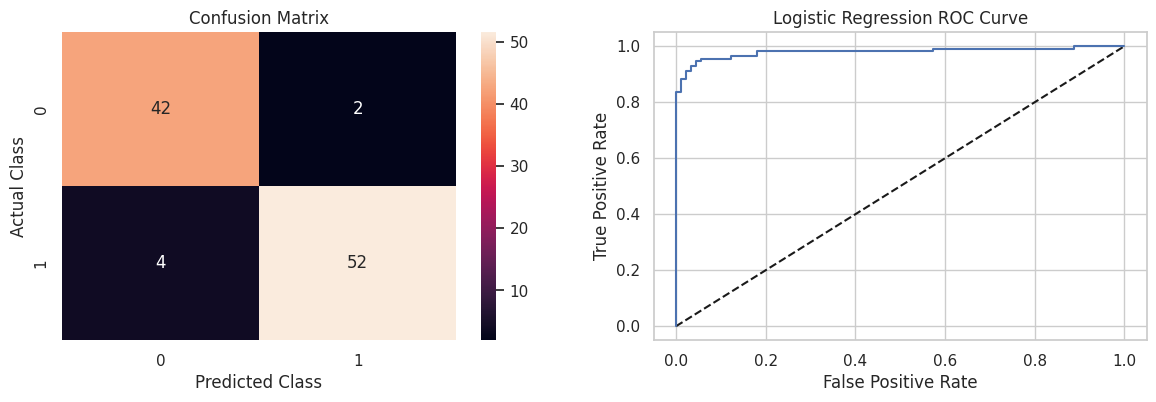

In [ ]:
# Calculate the confusion matrix
con_mat = confusion_matrix(y_test, y_test_pred)

# Create a figure to display the confusion matrix and classification report
plt.figure(figsize=(14, 4))

# Create a subplot for the confusion matrix
plt.subplot(1, 2, 1)
sns.heatmap(con_mat / np.sum(con_mat) * 100, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

# Create a subplot for the ROC curve
plt.subplot(1, 2, 2)
# Use the best model to obtain predicted probabilities for the positive class
LR_best_pred_probs = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, LR_best_pred_probs)

# Create a plot for the ROC curve
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.plot(fpr, tpr)  # ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()
